# CS 4644: Final Project Visualizations

Copyright (c) 2025 Ethan Nguyen-Tu

## Part 1: Setup

##### STEP 1: Mount Google Drive and Set Device for Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
project_folder = "drive/MyDrive/CS4644_FinalProject"

##### STEP 2: All Imports

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

##### STEP 3: General Helper Functions

In [4]:
def load_history(csv):
  return pd.read_csv(''.join([project_folder, "/History", csv]))

In [5]:
def loss_valid_comp(model_name, training_loss, training_accuracy, validation_loss, validation_accuracy, xshift=1, yshift=0.55):
  fig, axs = plt.subplots(1, 2, figsize=(12, 5))

  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Loss', color='tab:red')
  tl, = axs[0].plot(training_loss, label='Loss', color='tab:red')
  axs[0].set_title(' '.join([model_name, 'Training Curves']))

  ax0Twin = axs[0].twinx()
  ax0Twin.set_ylabel('Accuracy', color='tab:blue')
  tv, = ax0Twin.plot(training_accuracy, label='Accuracy')

  axs[0].legend([tl, tv], [tl.get_label(), tv.get_label()], bbox_to_anchor=(xshift, yshift))


  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Loss', color='tab:red')
  vl, = axs[1].plot(validation_loss, label='Loss', color='tab:red')
  axs[1].set_title(' '.join([model_name, 'Validation Curves']))

  ax1Twin = axs[1].twinx()
  ax1Twin.set_ylabel('Accuracy', color='tab:blue')
  vv, = ax1Twin.plot(validation_accuracy, label='Accuracy')

  axs[1].legend([vl, vv], [vl.get_label(), vv.get_label()], bbox_to_anchor=(xshift, yshift))

  plt.tight_layout()
  plt.show()

In [6]:
def model_results(model_name, training_loss, training_accuracy, validation_loss, validation_accuracy):
  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.plot(training_loss, label='Training Loss')
  plt.plot(validation_loss, label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.title(' '.join([model_name, 'Loss Curves']))

  plt.subplot(1, 2, 2)
  plt.plot(training_accuracy, label='Training Accuracy')
  plt.plot(validation_accuracy, label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title(' '.join([model_name, 'Accuracy Curves']))

  plt.tight_layout()
  plt.show()

In [7]:
def model_plots(model_name, model_history, xshift=1, yshift=0.55):
  loss_valid_comp(model_name, model_history["loss"], model_history["accuracy"], model_history["val_loss"], model_history["val_accuracy"], xshift, yshift)
  model_results(model_name, model_history["loss"], model_history["accuracy"], model_history["val_loss"], model_history["val_accuracy"])

In [8]:
def model_comparison(model1_name, model1_loss, model1_accuracy, model2_name, model2_loss, model2_accuracy, prefix="Training"):

  loss_diff = abs(model1_loss - model2_loss)
  val_diff = abs(model1_accuracy - model2_accuracy)
  print("Loss Difference:\n", loss_diff)
  print("Max Loss Difference:", max(loss_diff))
  print("Accuracy Difference:\n", val_diff)
  print("Max Accuracy Difference:", max(val_diff))

  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.plot(model1_loss, label=' '.join([model1_name, prefix, 'Loss']))
  plt.plot(model2_loss, label=' '.join([model2_name, prefix, 'Loss']))
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.title(' '.join([model1_name, 'vs.', model2_name, 'Loss Curves']))

  plt.subplot(1, 2, 2)
  plt.plot(model1_accuracy, label=' '.join([model1_name, prefix, 'Accuracy']))
  plt.plot(model2_accuracy, label=' '.join([model2_name, prefix, 'Accuracy']))
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title(' '.join([model1_name, 'vs.', model2_name, 'Accuracy Curves']))

  plt.tight_layout()
  plt.show()

In [9]:
def full_model_comparison(model1_name, model1_history, model2_name, model2_history):
  model_comparison(model1_name, model1_history["loss"], model1_history["accuracy"], model2_name, model2_history["loss"], model2_history["accuracy"])
  model_comparison(model1_name, model1_history["val_loss"], model1_history["val_accuracy"], model2_name, model2_history["val_loss"], model2_history["val_accuracy"], prefix="Validation")

## PART 2: Model Visualizations

##### Keras Reference Model

In [10]:
model_reference_history = load_history('/model_reference_history.csv')
model_reference_history

,Unnamed: 0,accuracy,loss,val_accuracy,val_loss
0,0,0.593598,0.660705,0.724806,0.604095
1,1,0.812803,0.515495,0.895349,0.341920
2,2,0.949564,0.198628,0.972868,0.075504
3,3,0.978661,0.056446,0.988372,0.023860
4,4,0.991271,0.025314,0.996124,0.015338
5,5,0.999030,0.007643,0.988372,0.021239
6,6,1.000000,0.005165,0.992248,0.018742
7,7,1.000000,0.003601,0.996124,0.014542
8,8,1.000000,0.002036,0.996124,0.012867
9,9,1.000000,0.001140,0.996124,0.017865


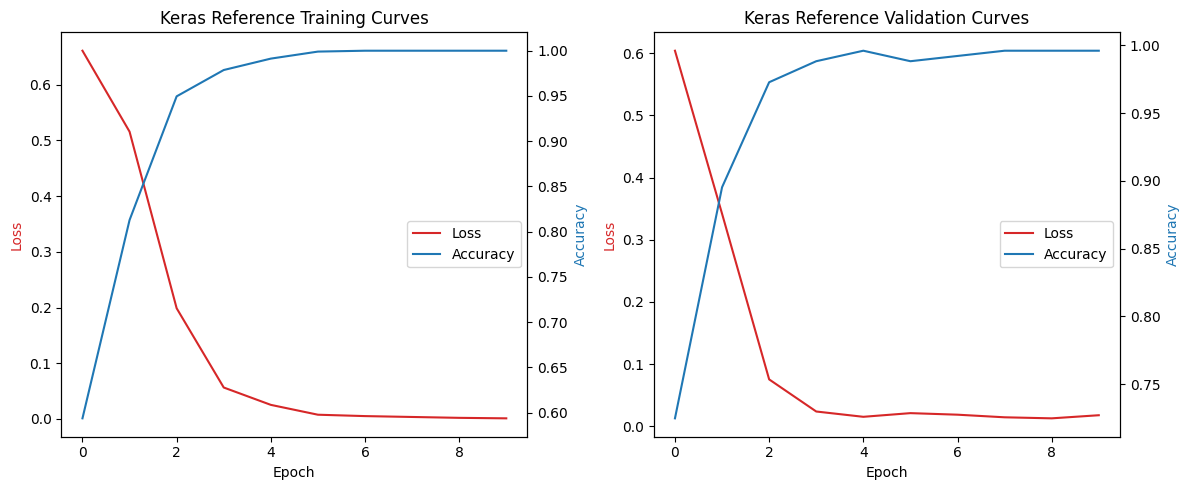

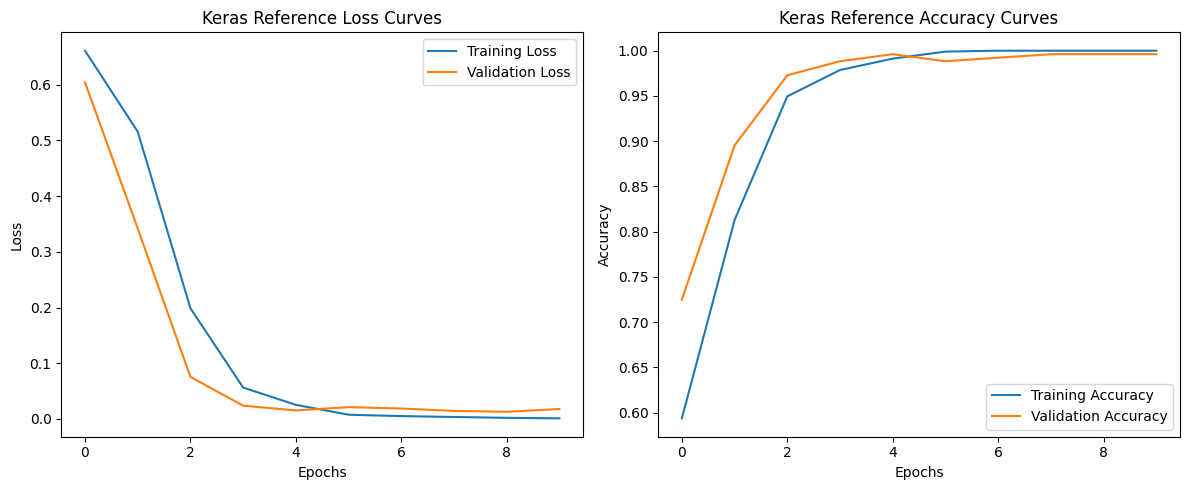

In [11]:
model_plots("Keras Reference", model_reference_history)

##### PyTorch Conversion Model

In [12]:
pytorch_conversion_history = load_history('/pytorch_conversion_history.csv')
pytorch_conversion_history

,Unnamed: 0,accuracy,loss,val_accuracy,val_loss
0,0,0.540252,0.689503,0.538760,0.699417
1,1,0.544132,0.676888,0.624031,0.667686
2,2,0.780795,0.507133,0.875969,0.293042
3,3,0.896217,0.234463,0.953488,0.099015
4,4,0.955383,0.125338,0.968992,0.070615
5,5,0.967992,0.088435,0.988372,0.040238
6,6,0.983511,0.053033,0.984496,0.035191
7,7,0.985451,0.036019,0.996124,0.030963
8,8,0.994180,0.024632,0.996124,0.032331
9,9,0.995150,0.015329,0.984496,0.034484


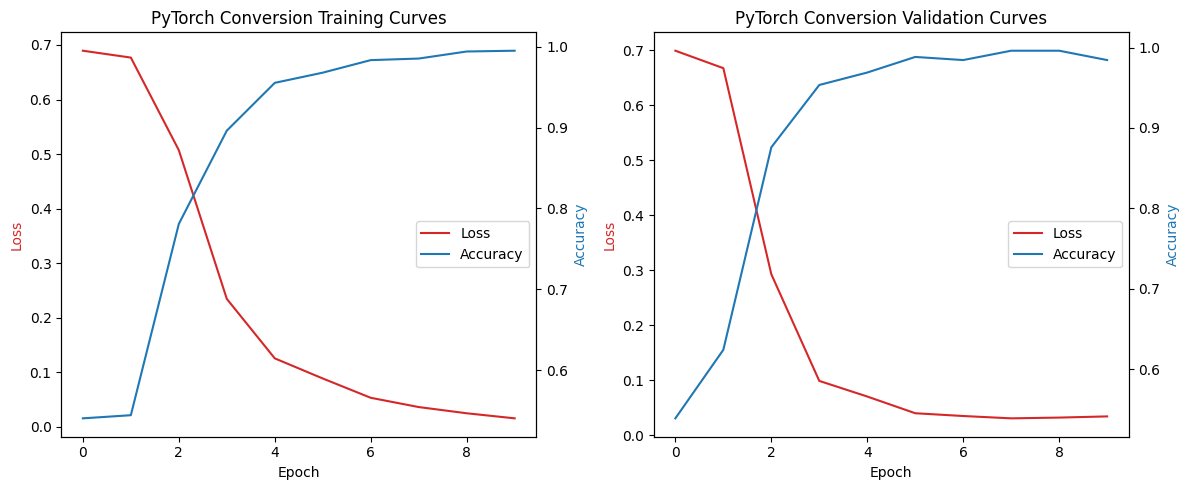

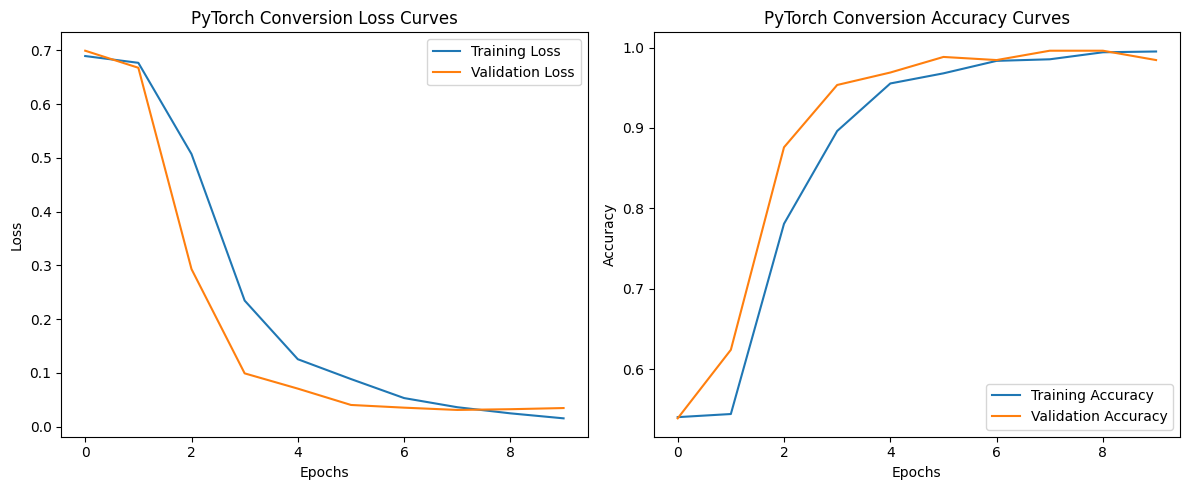

In [13]:
model_plots("PyTorch Conversion", pytorch_conversion_history)

##### Keras 10x Learning Rate Model

In [14]:
keras_10x_LR_history = load_history('/keras_10x_LR_history.csv')
keras_10x_LR_history

,Unnamed: 0,accuracy,loss,val_accuracy,val_loss
0,0,0.514064,0.709398,0.538760,0.684947
1,1,0.620757,0.672691,0.593023,0.581557
2,2,0.914646,0.282312,0.972868,0.085967
3,3,0.987391,0.053579,0.988372,0.075966
4,4,0.993210,0.023344,0.972868,0.095960
5,5,0.995150,0.020928,0.992248,0.054178
6,6,0.991271,0.021332,0.988372,0.051000
7,7,0.998060,0.007621,0.980620,0.042812
8,8,1.000000,0.001794,0.984496,0.059676
9,9,1.000000,0.000280,0.984496,0.088866


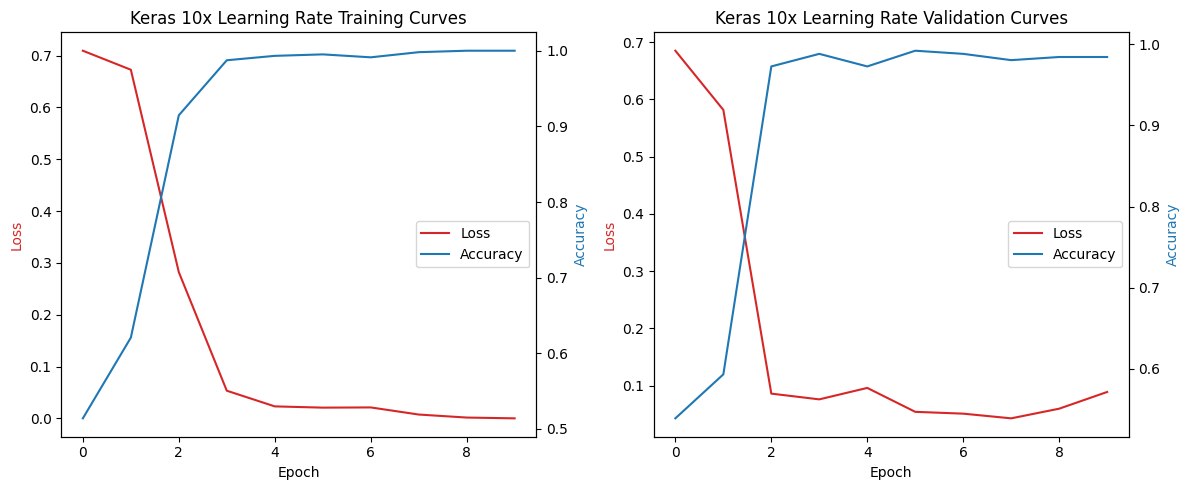

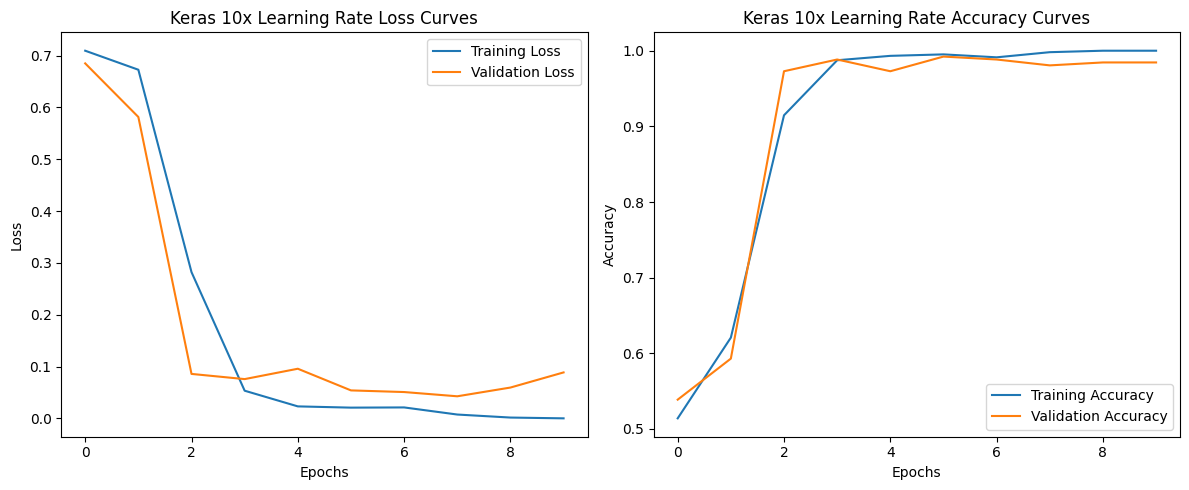

In [15]:
model_plots("Keras 10x Learning Rate", keras_10x_LR_history)

##### PyTorch 10x Learning Rate Model

In [16]:
pyTorch_10x_LR_history = load_history('/pytorch_10X_LR_history.csv')
pyTorch_10x_LR_history

,Unnamed: 0,accuracy,loss,val_accuracy,val_loss
0,0,0.528613,0.696424,0.538760,0.702956
1,1,0.544132,0.687492,0.538760,0.703638
2,2,0.705141,0.542407,0.868217,0.300824
3,3,0.930165,0.180225,0.926357,0.157938
4,4,0.960233,0.091826,0.976744,0.056932
5,5,0.991271,0.026984,0.988372,0.040748
6,6,0.998060,0.006330,0.992248,0.046156
7,7,0.999030,0.002072,0.976744,0.047103
8,8,0.995150,0.015752,0.996124,0.012086
9,9,0.997090,0.010268,0.988372,0.055203


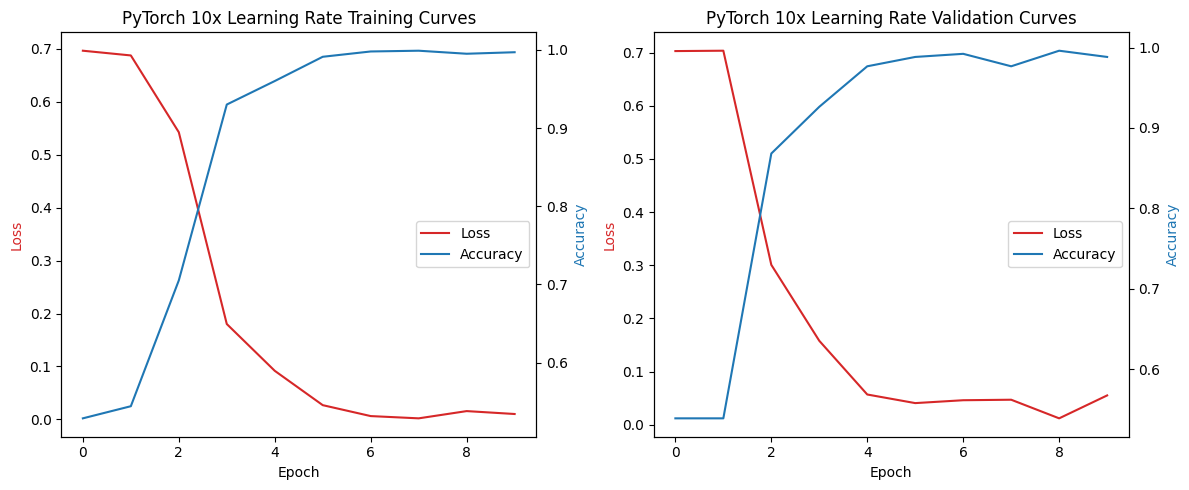

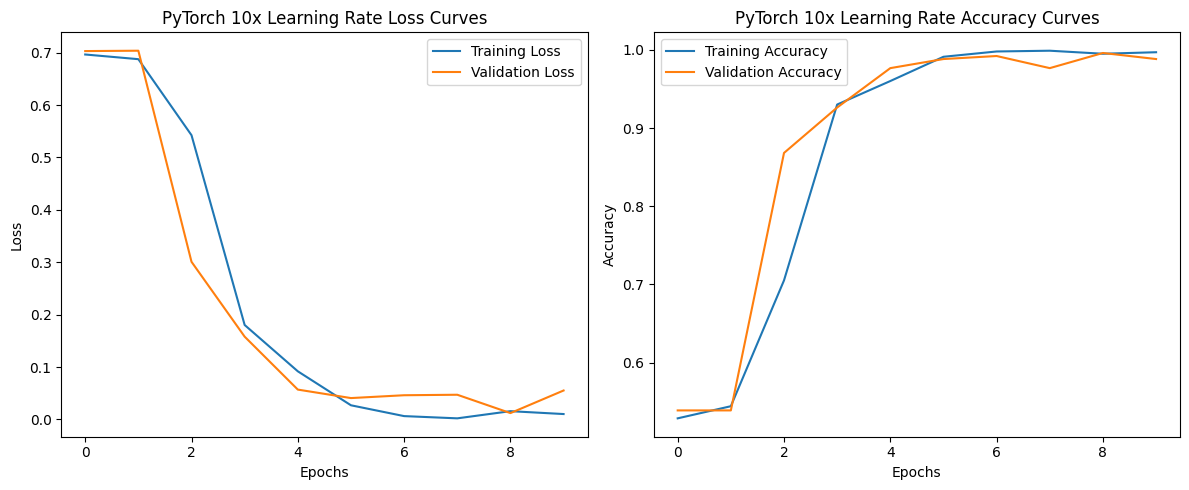

In [17]:
model_plots("PyTorch 10x Learning Rate", pyTorch_10x_LR_history)

##### Keras 100x Learning Rate Model

In [18]:
keras_100x_LR_history = load_history('/keras_100x_LR_history.csv')
keras_100x_LR_history

,Unnamed: 0,accuracy,loss,val_accuracy,val_loss
0,0,0.486906,15.791861,0.546512,0.690219
1,1,0.515034,5.813708,0.538760,0.690228
2,2,0.521823,0.692306,0.538760,0.697046
3,3,0.523763,0.690967,0.538760,0.693089
4,4,0.584869,0.676565,0.445736,1.265825
5,5,0.534433,0.790690,0.538760,0.691148
6,6,0.518914,0.696424,0.538760,0.690340
7,7,0.544132,0.689583,0.538760,0.691942
8,8,0.544132,0.691003,0.538760,0.690308
9,9,0.544132,0.690289,0.538760,0.690152


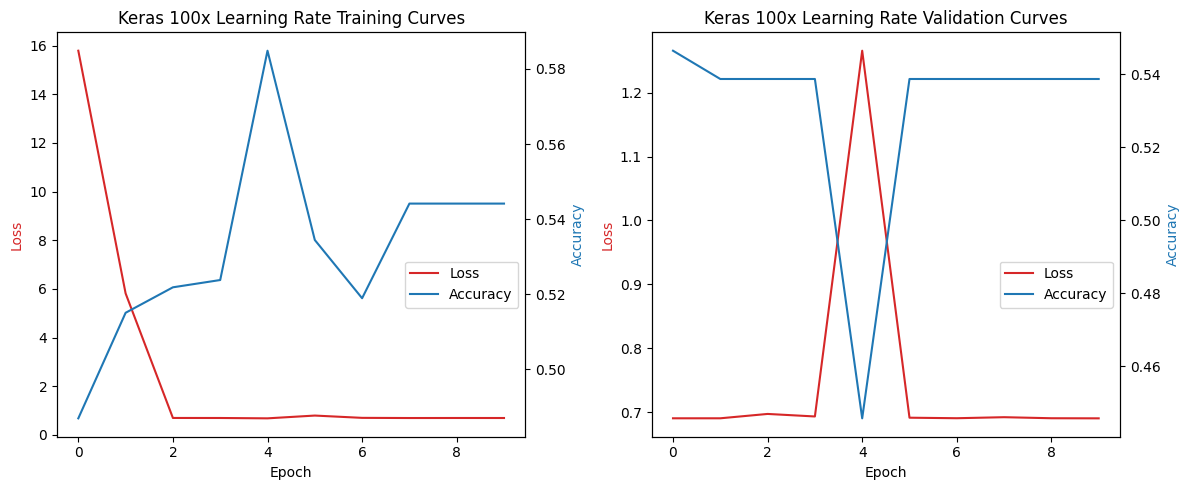

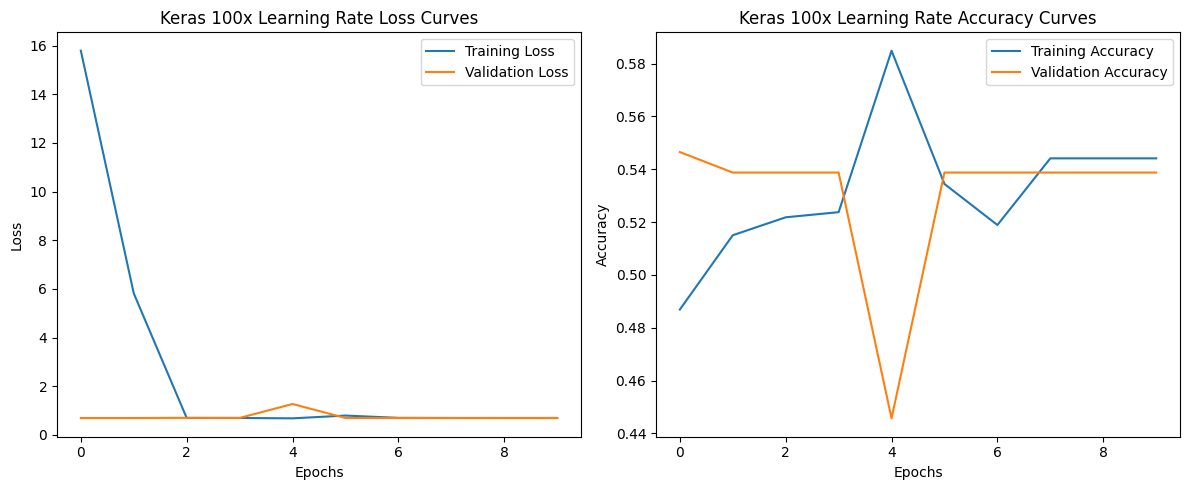

In [19]:
model_plots("Keras 100x Learning Rate", keras_100x_LR_history, yshift=0.45)

##### PyTorch 100x Learning Rate Model

In [20]:
pyTorch_100x_LR_history = load_history('/pytorch_100X_LR_history.csv')
pyTorch_100x_LR_history

,Unnamed: 0,accuracy,loss,val_accuracy,val_loss
0,0,0.481086,32.218477,0.46124,0.688694
1,1,0.513094,1.473510,0.53876,0.705333
2,2,0.544132,0.751336,0.53876,0.729134
3,3,0.543162,0.691236,0.53876,0.699245
4,4,0.544132,0.689422,0.53876,0.716976
5,5,0.544132,0.692355,0.53876,0.710030
6,6,0.544132,0.690466,0.53876,0.701136
7,7,0.544132,0.689263,0.53876,0.708256
8,8,0.544132,0.689237,0.53876,0.708749
9,9,0.544132,0.687749,0.53876,0.710134


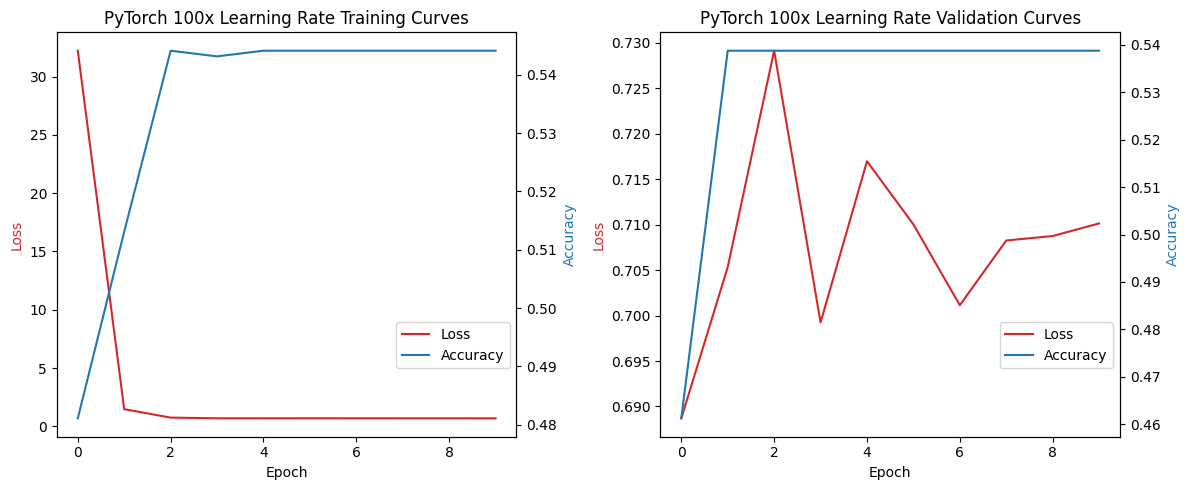

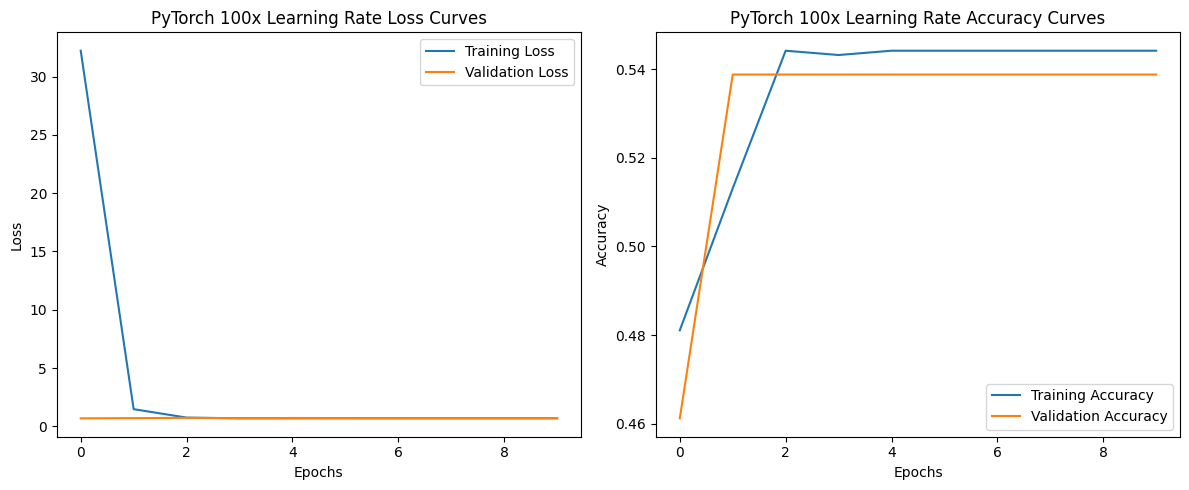

In [21]:
model_plots("PyTorch 100x Learning Rate", pyTorch_100x_LR_history, yshift=0.3)

##### Keras Additional Layers Model

In [22]:
keras_additional_conv_history = load_history('/keras_additional_conv_history.csv')
keras_additional_conv_history

,Unnamed: 0,accuracy,loss,val_accuracy,val_loss
0,0,0.586809,0.669874,0.658915,0.632945
1,1,0.681862,0.593424,0.720930,0.530429
2,2,0.815713,0.433823,0.949612,0.281537
3,3,0.963143,0.156359,0.992248,0.052368
4,4,0.978661,0.047415,0.992248,0.045548
5,5,0.988361,0.033403,0.992248,0.019914
6,6,0.997090,0.014486,0.988372,0.053982
7,7,0.993210,0.015062,0.992248,0.032010
8,8,0.999030,0.006864,0.992248,0.026022
9,9,0.999030,0.005985,0.996124,0.020026


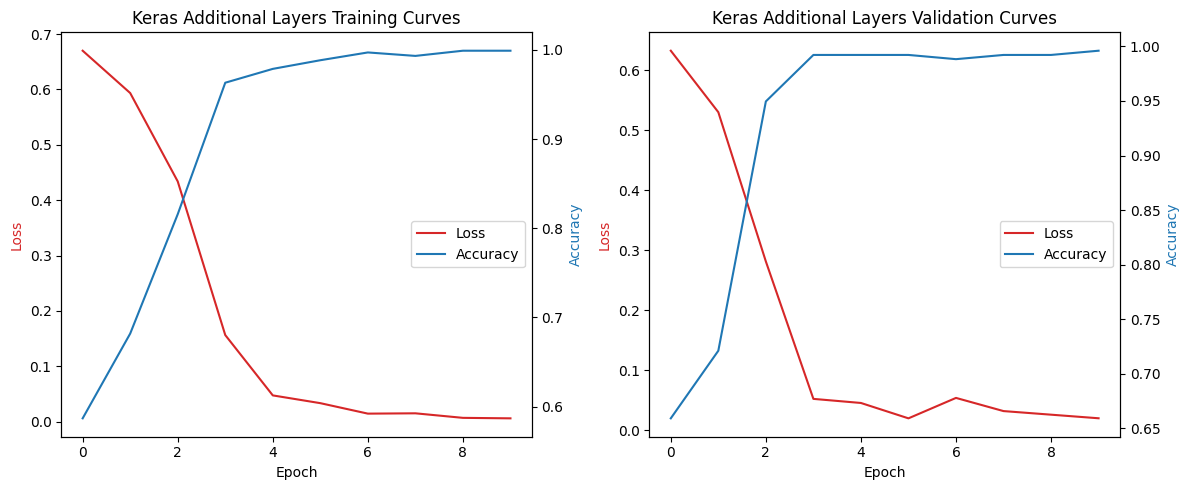

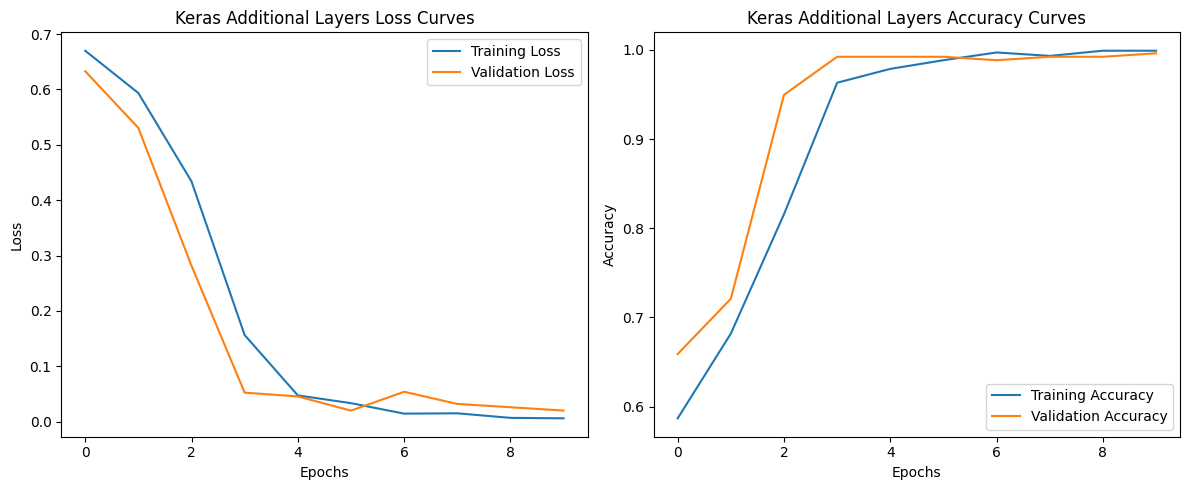

In [23]:
model_plots("Keras Additional Layers", keras_additional_conv_history)

##### PyTorch Additional Layers Model

In [24]:
pyTorch_additional_conv_history = load_history('/pytorch_additional_conv_history.csv')
pyTorch_additional_conv_history

,Unnamed: 0,accuracy,loss,val_accuracy,val_loss
0,0,0.544132,0.689436,0.538760,0.706762
1,1,0.544132,0.678844,0.538760,0.653183
2,2,0.811833,0.418178,0.941860,0.116003
3,3,0.957323,0.124556,0.992248,0.025679
4,4,0.988361,0.039667,0.996124,0.012740
5,5,0.998060,0.011014,0.996124,0.005922
6,6,1.000000,0.002119,0.996124,0.005873
7,7,1.000000,0.001003,0.996124,0.002690
8,8,1.000000,0.000448,0.996124,0.002686
9,9,1.000000,0.000299,0.996124,0.002782


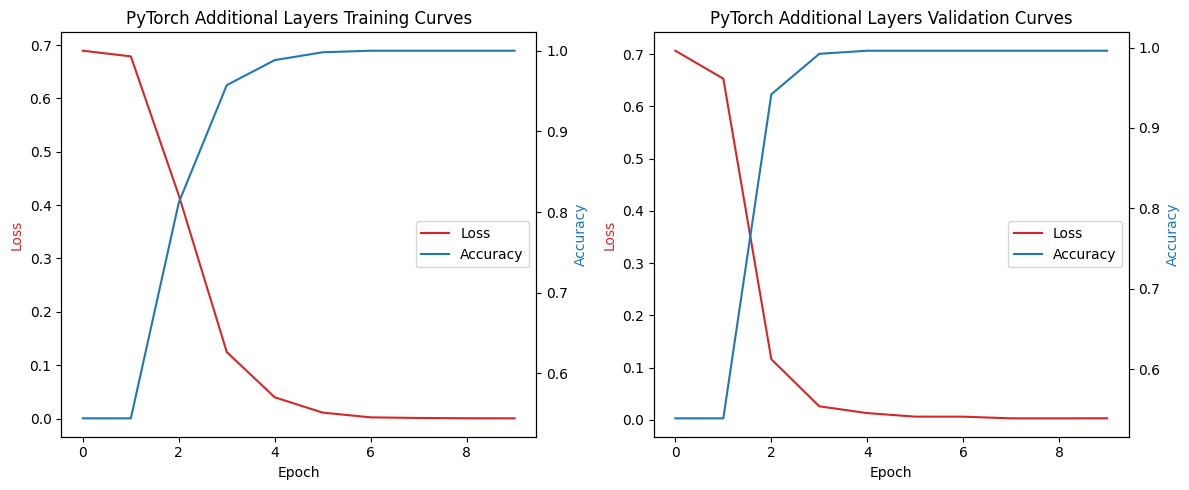

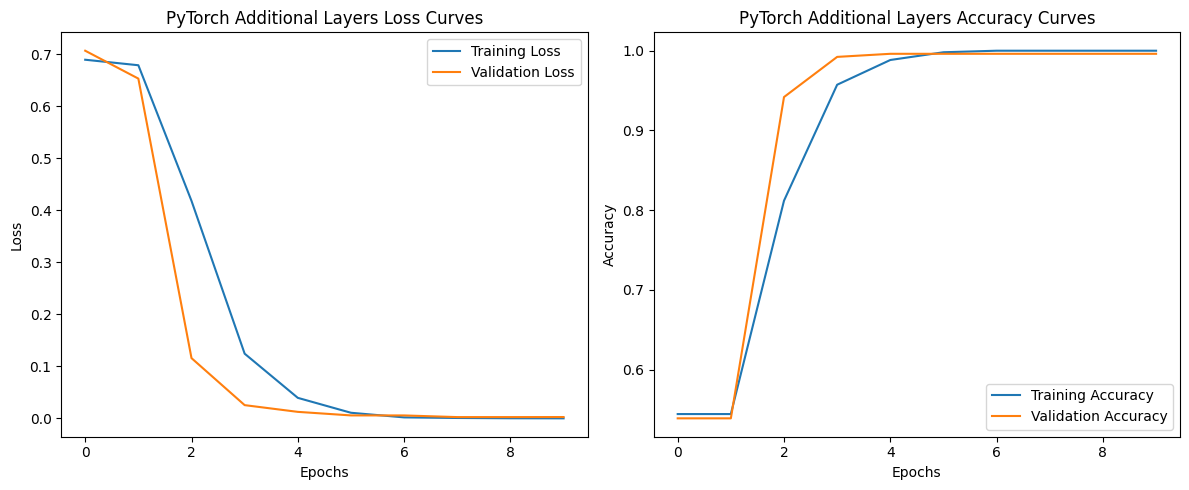

In [25]:
model_plots("PyTorch Additional Layers", pyTorch_additional_conv_history)

##### Keras Image Transforms Model

In [26]:
keras_imageTransforms_history = load_history('/keras_imageTransforms_history.csv')
keras_imageTransforms_history

,Unnamed: 0,accuracy,loss,val_accuracy,val_loss
0,0,0.553831,0.685507,0.542636,0.680242
1,1,0.582929,0.661975,0.651163,0.632145
2,2,0.709020,0.566907,0.829457,0.494663
3,3,0.858390,0.363024,0.957364,0.195317
4,4,0.949564,0.158713,0.992248,0.057142
5,5,0.977692,0.065689,0.996124,0.024327
6,6,0.986421,0.039658,0.992248,0.019231
7,7,0.994180,0.023597,0.992248,0.033469
8,8,0.985451,0.045004,0.992248,0.018026
9,9,0.991271,0.023751,0.992248,0.021724


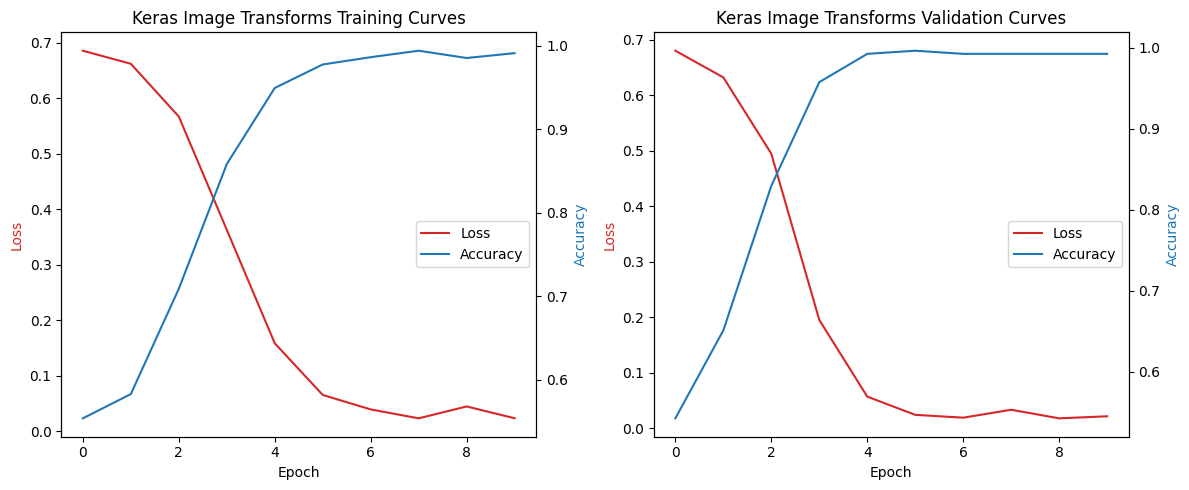

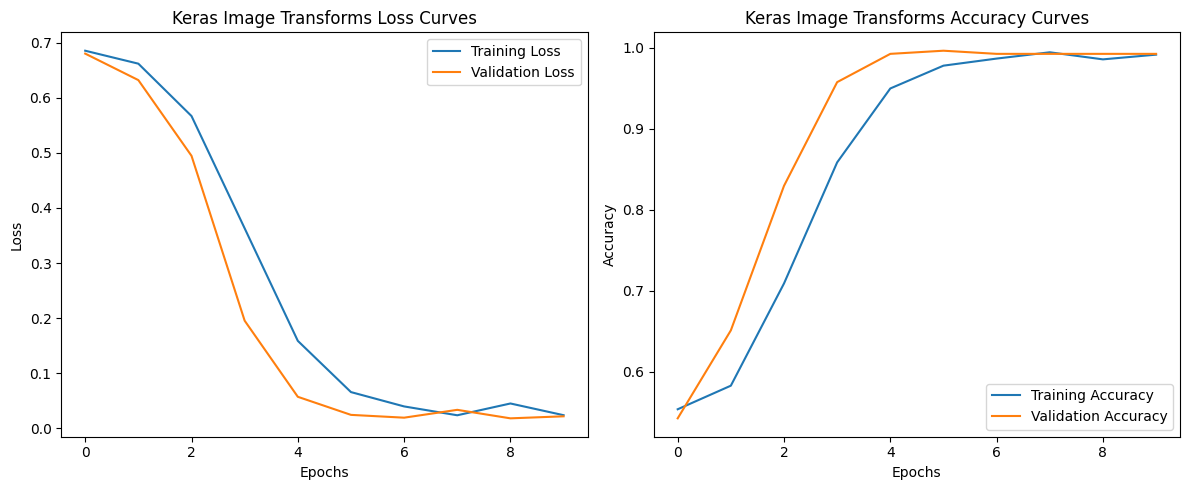

In [27]:
model_plots("Keras Image Transforms", keras_imageTransforms_history)

##### PyTorch Image Transforms Model

In [28]:
pyTorch_imageTransforms_history = load_history('/pyTorch_imageTransforms_history.csv')
pyTorch_imageTransforms_history

,Unnamed: 0,accuracy,loss,val_accuracy,val_loss
0,0,0.560621,0.682328,0.538760,0.696114
1,1,0.725509,0.523459,0.779070,0.583484
2,2,0.922405,0.188413,0.945736,0.519509
3,3,0.968962,0.084682,0.720930,0.518784
4,4,0.980601,0.045881,0.972868,0.338890
5,5,0.996120,0.018526,0.972868,0.307655
6,6,1.000000,0.008335,0.980620,0.216450
7,7,1.000000,0.004119,0.988372,0.186519
8,8,1.000000,0.001739,0.984496,0.161764
9,9,1.000000,0.000899,0.980620,0.150488


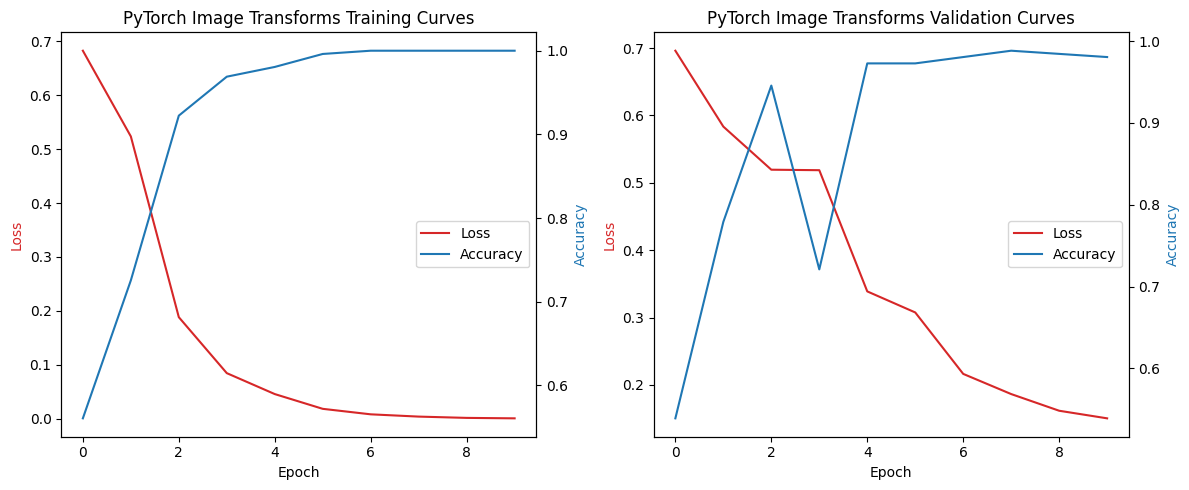

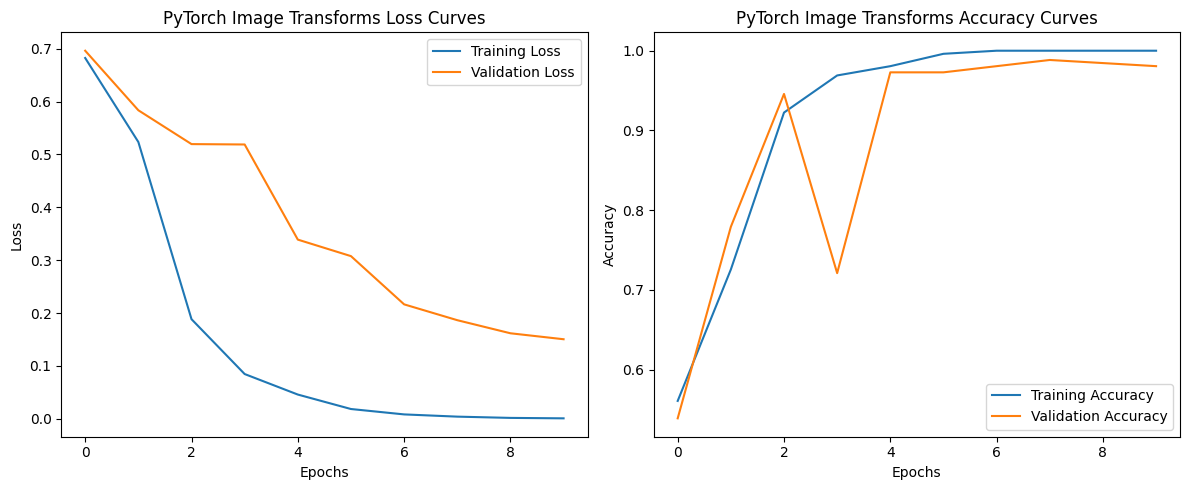

In [29]:
model_plots("PyTorch Image Transforms", pyTorch_imageTransforms_history)

## PART 3: Model Comparisons

##### Keras vs. PyTorch

BASELINE: Keras Reference vs. PyTorch Conversion

Loss Difference:
 0    0.028798
1    0.161393
2    0.308505
3    0.178017
4    0.100024
5    0.080792
6    0.047869
7    0.032418
8    0.022596
9    0.014189
Name: loss, dtype: float64
Max Loss Difference: 0.3085053475464092
Accuracy Difference:
 0    0.053346
1    0.268671
2    0.168768
3    0.082444
4    0.035887
5    0.031038
6    0.016489
7    0.014549
8    0.005820
9    0.004850
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.2686711788524365


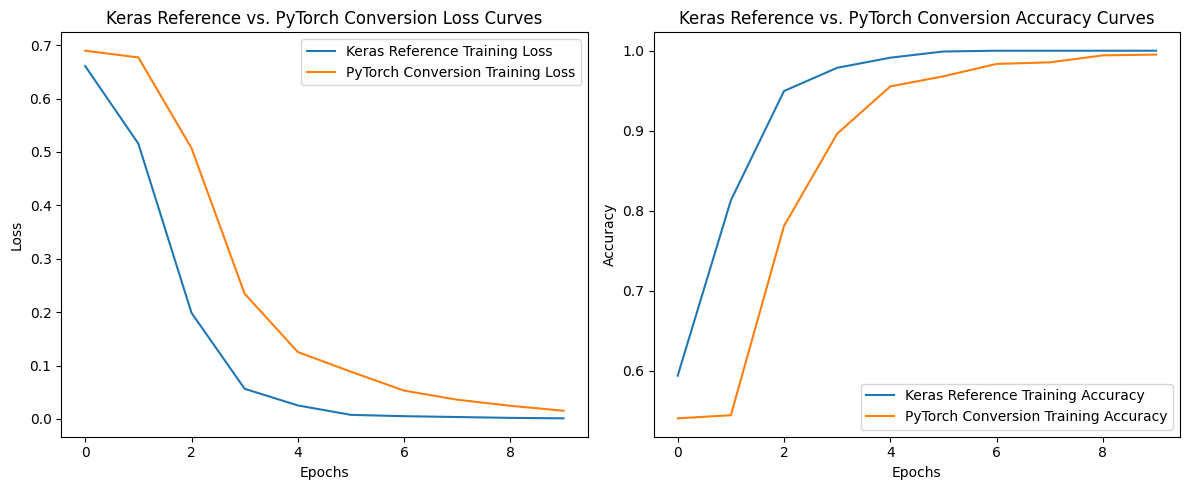

Loss Difference:
 0    0.095322
1    0.325766
2    0.217537
3    0.075155
4    0.055277
5    0.018999
6    0.016449
7    0.016421
8    0.019464
9    0.016619
Name: val_loss, dtype: float64
Max Loss Difference: 0.32576608061790474
Accuracy Difference:
 0    1.860465e-01
1    2.713178e-01
2    9.689921e-02
3    3.488372e-02
4    2.713178e-02
5    5.544618e-09
6    7.751934e-03
7    1.848206e-09
8    1.848206e-09
9    1.162791e-02
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.27131783916044605


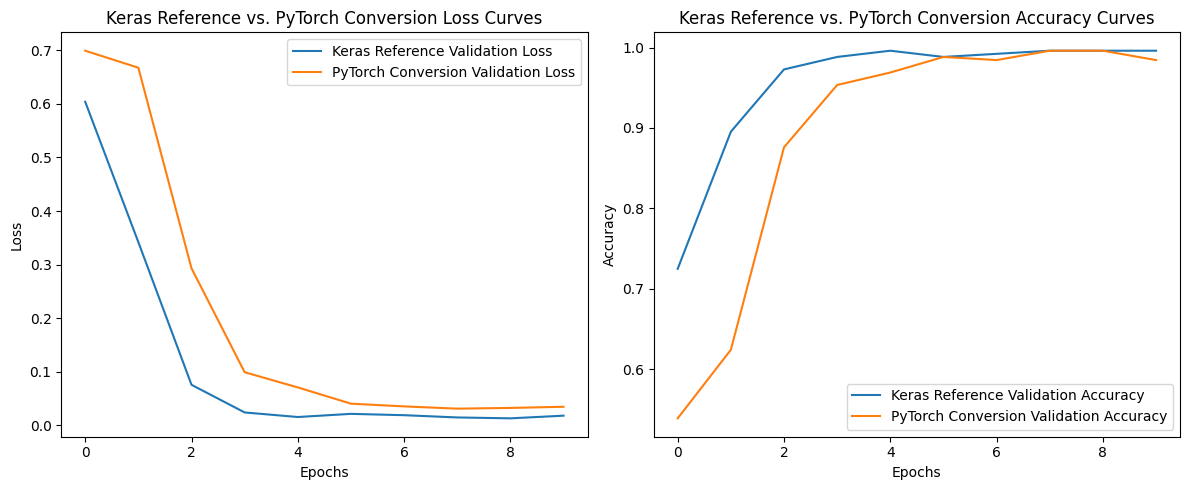

In [30]:
full_model_comparison("Keras Reference", model_reference_history, "PyTorch Conversion", pytorch_conversion_history)

10x Learning Rate

Loss Difference:
 0    0.012974
1    0.014800
2    0.260096
3    0.126646
4    0.068482
5    0.006056
6    0.015002
7    0.005549
8    0.013958
9    0.009988
Name: loss, dtype: float64
Max Loss Difference: 0.26009562962195454
Accuracy Difference:
 0    0.014549
1    0.076625
2    0.209505
3    0.057226
4    0.032978
5    0.003880
6    0.006790
7    0.000970
8    0.004850
9    0.002910
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.20950532971251723


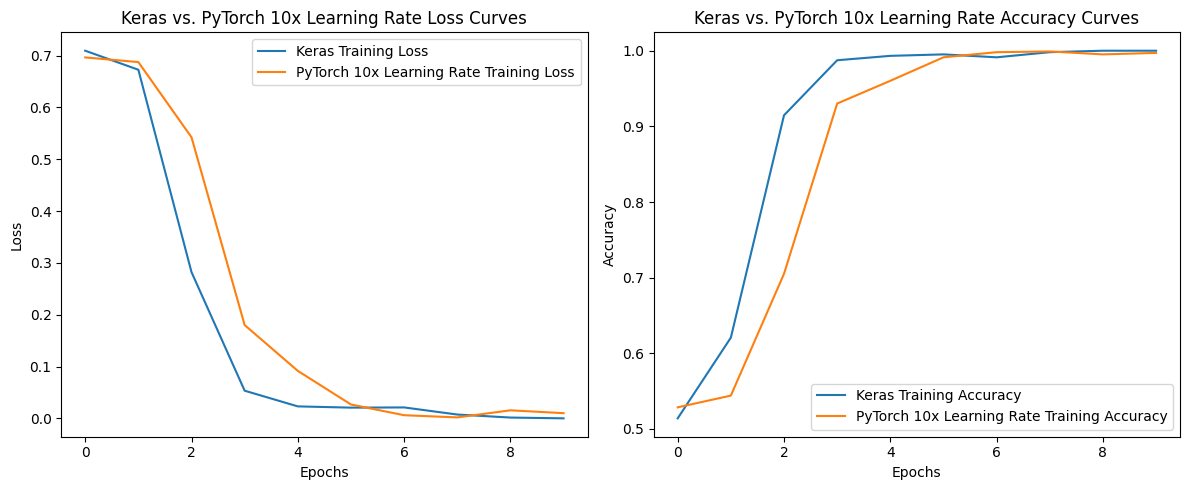

Loss Difference:
 0    0.018009
1    0.122081
2    0.214857
3    0.081972
4    0.039028
5    0.013429
6    0.004844
7    0.004291
8    0.047590
9    0.033664
Name: val_loss, dtype: float64
Max Loss Difference: 0.2148571267724037
Accuracy Difference:
 0    1.848206e-08
1    5.426355e-02
2    1.046511e-01
3    6.201550e-02
4    3.875982e-03
5    3.875965e-03
6    3.875975e-03
7    3.875960e-03
8    1.162791e-02
9    3.875976e-03
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.1046511498532553


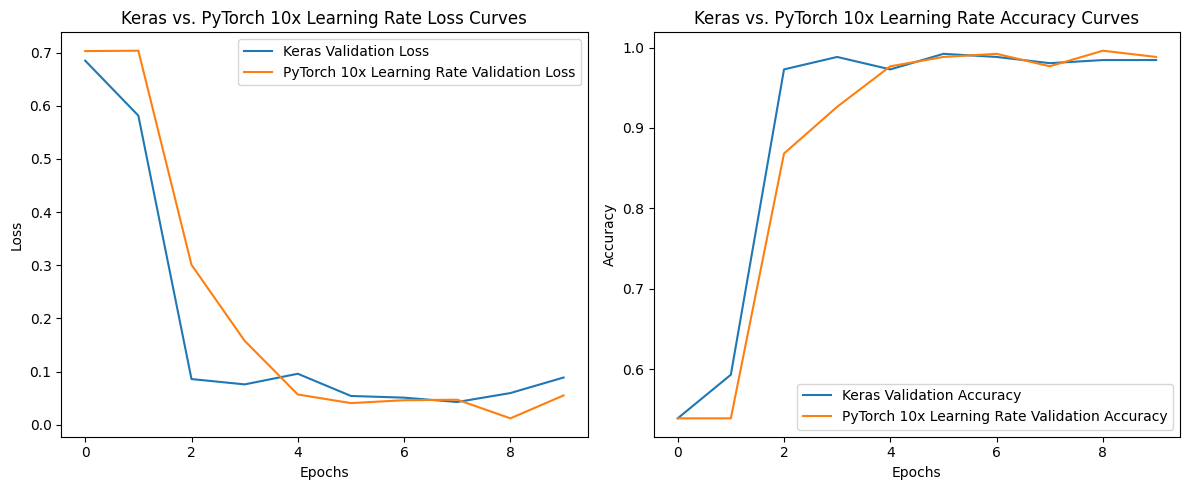

In [31]:
full_model_comparison("Keras", keras_10x_LR_history, "PyTorch 10x Learning Rate", pyTorch_10x_LR_history)

100x Learning Rate

Loss Difference:
 0    16.426616
1     4.340198
2     0.059031
3     0.000269
4     0.012857
5     0.098335
6     0.005958
7     0.000320
8     0.001766
9     0.002540
Name: loss, dtype: float64
Max Loss Difference: 16.4266162795179
Accuracy Difference:
 0    5.819579e-03
1    1.939877e-03
2    2.230844e-02
3    1.939862e-02
4    4.073718e-02
5    9.699321e-03
6    2.521822e-02
7    2.387655e-08
8    2.387655e-08
9    2.387655e-08
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.04073717597615478


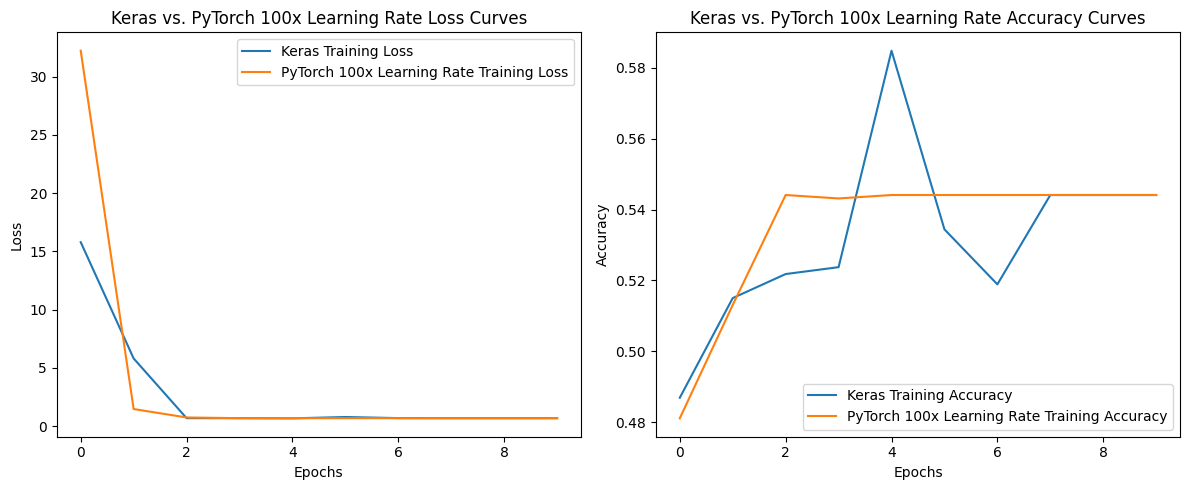

Loss Difference:
 0    0.001525
1    0.015105
2    0.032088
3    0.006156
4    0.548849
5    0.018881
6    0.010796
7    0.016314
8    0.018441
9    0.019983
Name: val_loss, dtype: float64
Max Loss Difference: 0.5488487601280212
Accuracy Difference:
 0    8.527134e-02
1    1.848206e-08
2    1.848206e-08
3    1.848206e-08
4    9.302325e-02
5    1.848206e-08
6    1.848206e-08
7    1.848206e-08
8    1.848206e-08
9    1.848206e-08
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.09302325188651567


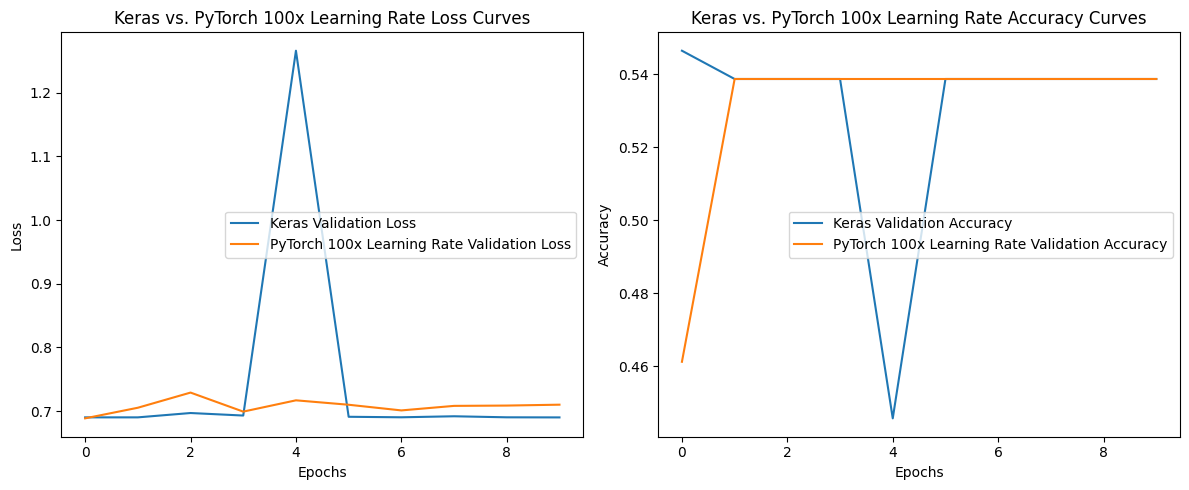

In [32]:
full_model_comparison("Keras", keras_100x_LR_history, "PyTorch 100x Learning Rate", pyTorch_100x_LR_history)

Additional Layers

Loss Difference:
 0    0.019562
1    0.085420
2    0.015645
3    0.031803
4    0.007747
5    0.022389
6    0.012367
7    0.014059
8    0.006416
9    0.005686
Name: loss, dtype: float64
Max Loss Difference: 0.08542003351099348
Accuracy Difference:
 0    0.042677
1    0.137730
2    0.003880
3    0.005820
4    0.009699
5    0.009699
6    0.002910
7    0.006790
8    0.000970
9    0.000970
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.13773038390767334


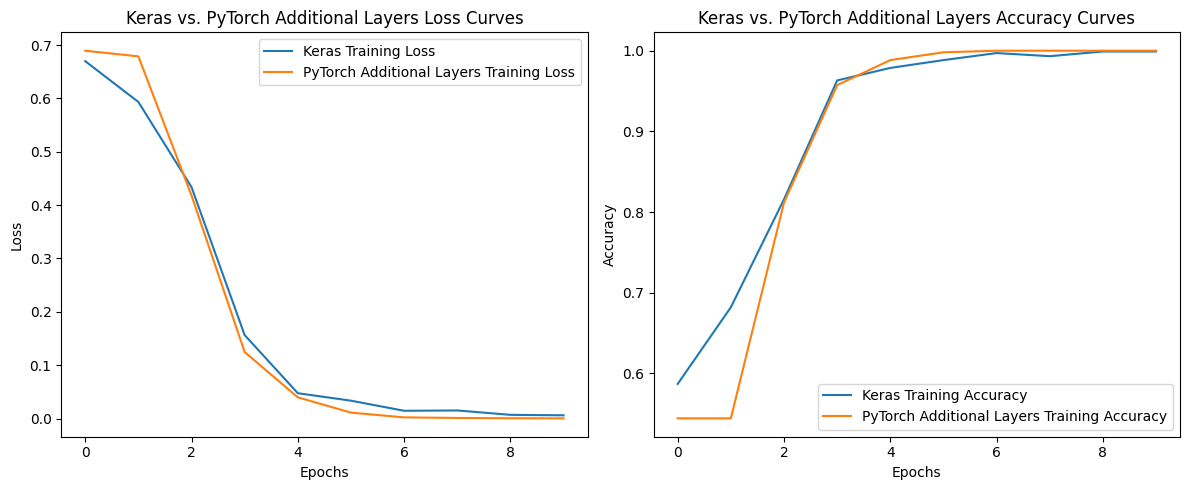

Loss Difference:
 0    0.073817
1    0.122754
2    0.165533
3    0.026690
4    0.032808
5    0.013992
6    0.048109
7    0.029320
8    0.023336
9    0.017245
Name: val_loss, dtype: float64
Max Loss Difference: 0.16553347595036028
Accuracy Difference:
 0    1.201551e-01
1    1.821705e-01
2    7.751914e-03
3    3.696412e-09
4    3.875973e-03
5    3.875973e-03
6    7.751944e-03
7    3.875973e-03
8    3.875973e-03
9    1.848206e-09
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.18217052877411366


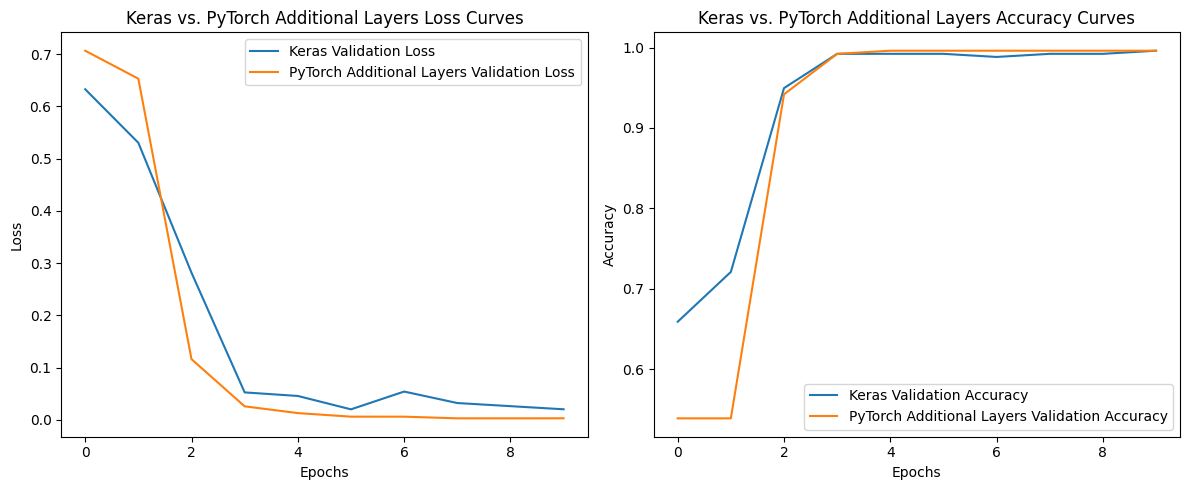

In [33]:
full_model_comparison("Keras", keras_additional_conv_history, "PyTorch Additional Layers", pyTorch_additional_conv_history)

Image Transforms

Loss Difference:
 0    0.003179
1    0.138516
2    0.378494
3    0.278342
4    0.112831
5    0.047163
6    0.031323
7    0.019478
8    0.043265
9    0.022852
Name: loss, dtype: float64
Max Loss Difference: 0.37849359119804027
Accuracy Difference:
 0    0.006790
1    0.142580
2    0.213385
3    0.110572
4    0.031038
5    0.018429
6    0.013579
7    0.005820
8    0.014549
9    0.008729
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.21338505541434227


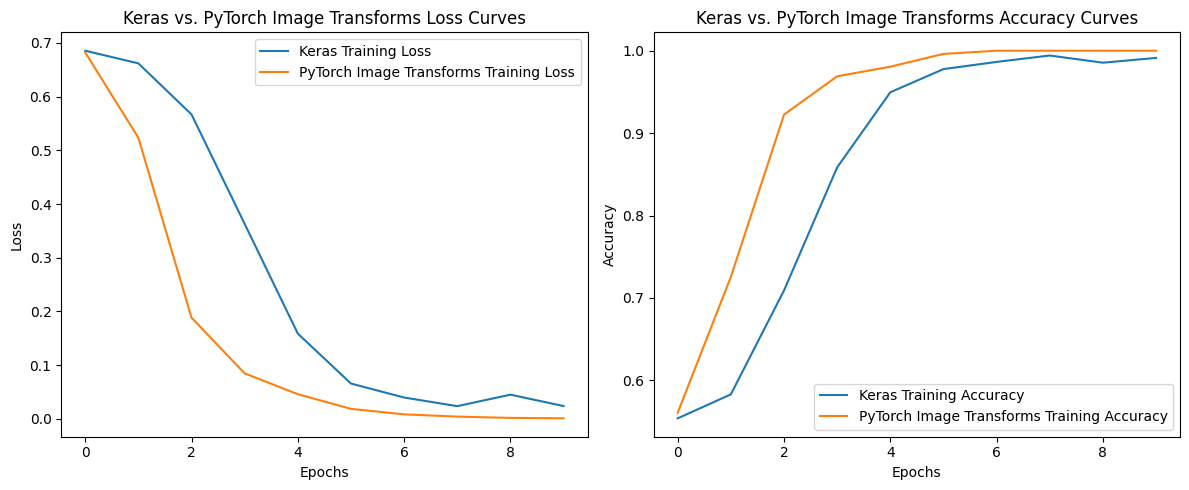

Loss Difference:
 0    0.015872
1    0.048661
2    0.024847
3    0.323467
4    0.281747
5    0.283329
6    0.197219
7    0.153050
8    0.143738
9    0.128765
Name: val_loss, dtype: float64
Max Loss Difference: 0.3234669625759125
Accuracy Difference:
 0    0.003876
1    0.127907
2    0.116279
3    0.236434
4    0.019380
5    0.023256
6    0.011628
7    0.003876
8    0.007752
9    0.011628
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.2364340881968653


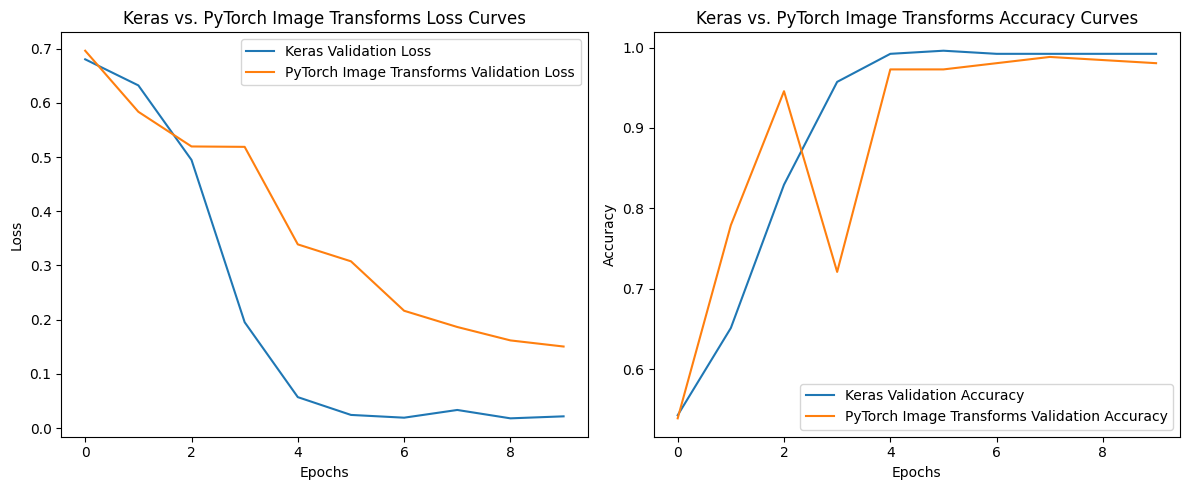

In [34]:
full_model_comparison("Keras", keras_imageTransforms_history, "PyTorch Image Transforms", pyTorch_imageTransforms_history)

##### Optimizations vs. Baseline (Keras)

10x Learning Rate

Loss Difference:
 0    0.048692
1    0.157196
2    0.083684
3    0.002868
4    0.001970
5    0.013285
6    0.016168
7    0.004020
8    0.000242
9    0.000860
Name: loss, dtype: float64
Max Loss Difference: 0.15719610452651978
Accuracy Difference:
 0    0.079534
1    0.192047
2    0.034918
3    0.008729
4    0.001940
5    0.003880
6    0.008729
7    0.001940
8    0.000000
9    0.000000
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.19204652309417725


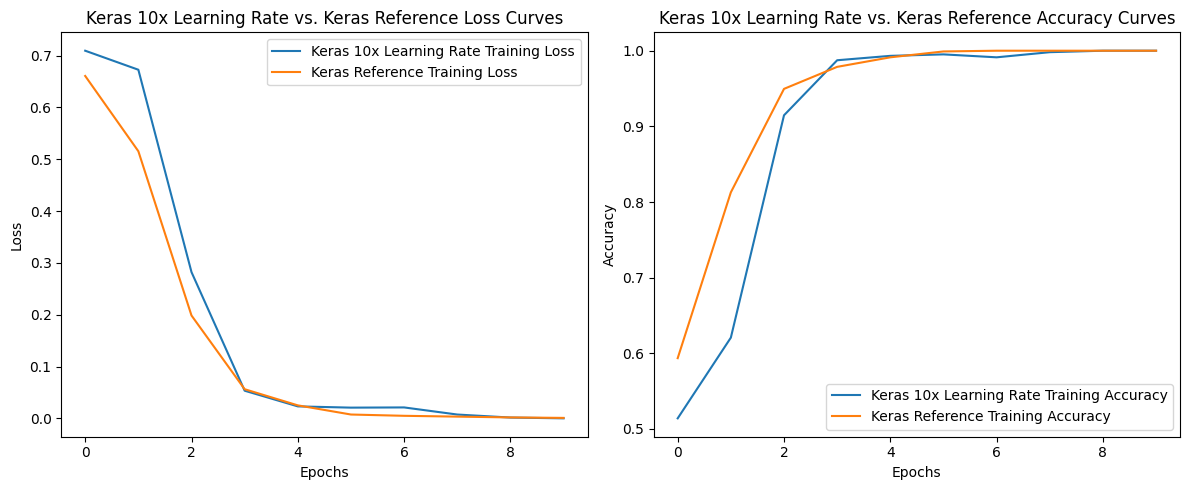

Loss Difference:
 0    0.080852
1    0.239638
2    0.010463
3    0.052106
4    0.080622
5    0.032939
6    0.032258
7    0.028270
8    0.046809
9    0.071002
Name: val_loss, dtype: float64
Max Loss Difference: 0.23963752388954168
Accuracy Difference:
 0    0.186046
1    0.302326
2    0.000000
3    0.000000
4    0.023256
5    0.003876
6    0.003876
7    0.015504
8    0.011628
9    0.011628
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.30232560634613037


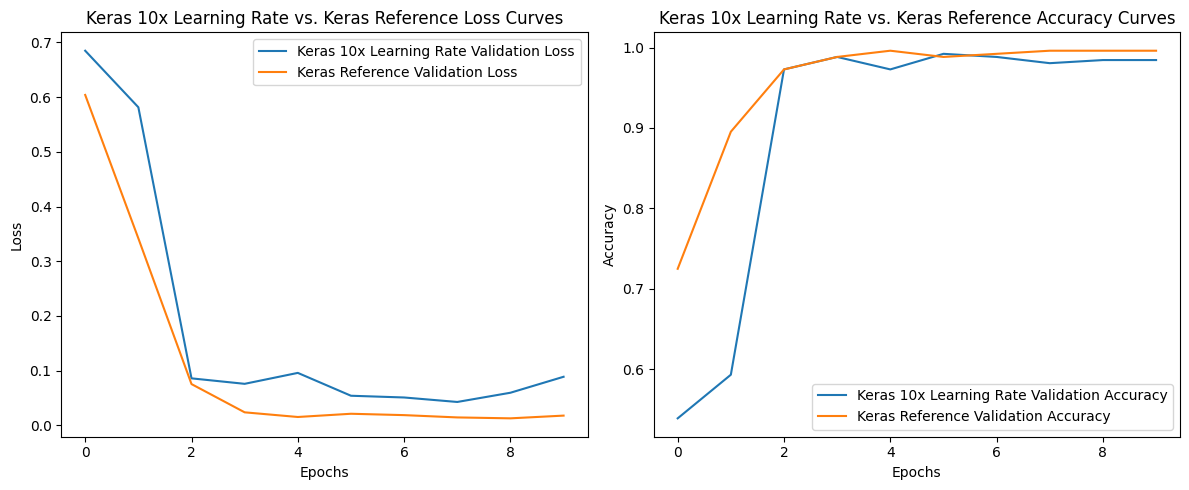

In [35]:
full_model_comparison("Keras 10x Learning Rate", keras_10x_LR_history, "Keras Reference", model_reference_history)

100x Learning Rate

Loss Difference:
 0    15.131155
1     5.298213
2     0.493678
3     0.634521
4     0.651251
5     0.783047
6     0.691260
7     0.685982
8     0.688967
9     0.689149
Name: loss, dtype: float64
Max Loss Difference: 15.131155133247375
Accuracy Difference:
 0    0.106693
1    0.297769
2    0.427740
3    0.454898
4    0.406402
5    0.464597
6    0.481086
7    0.455868
8    0.455868
9    0.455868
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.4810863137245178


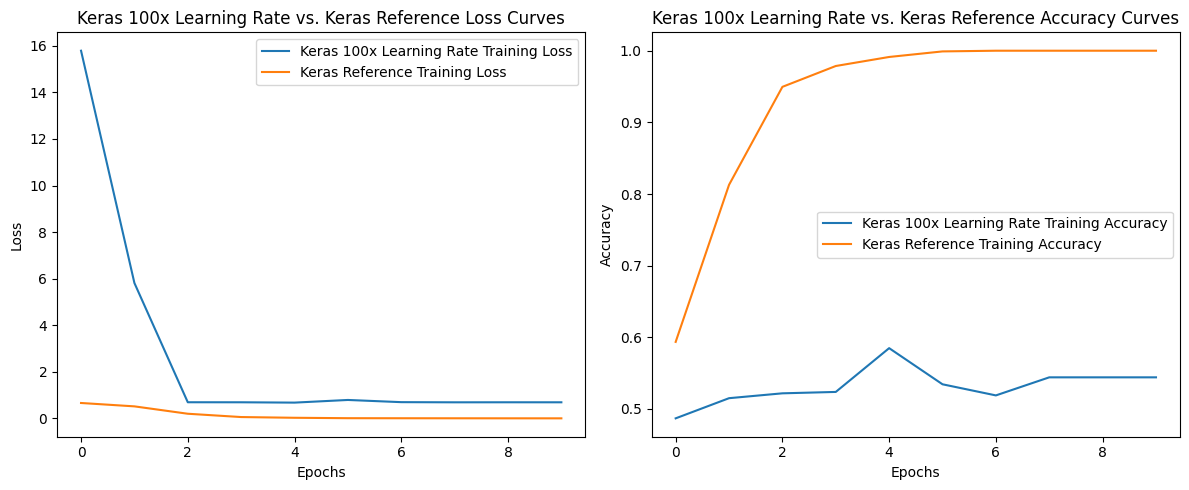

Loss Difference:
 0    0.086124
1    0.348308
2    0.621541
3    0.669229
4    1.250486
5    0.669909
6    0.671597
7    0.677400
8    0.677440
9    0.672287
Name: val_loss, dtype: float64
Max Loss Difference: 1.2504864251241088
Accuracy Difference:
 0    0.178295
1    0.356589
2    0.434108
3    0.449612
4    0.550388
5    0.449612
6    0.453488
7    0.457364
8    0.457364
9    0.457364
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.5503875911235812


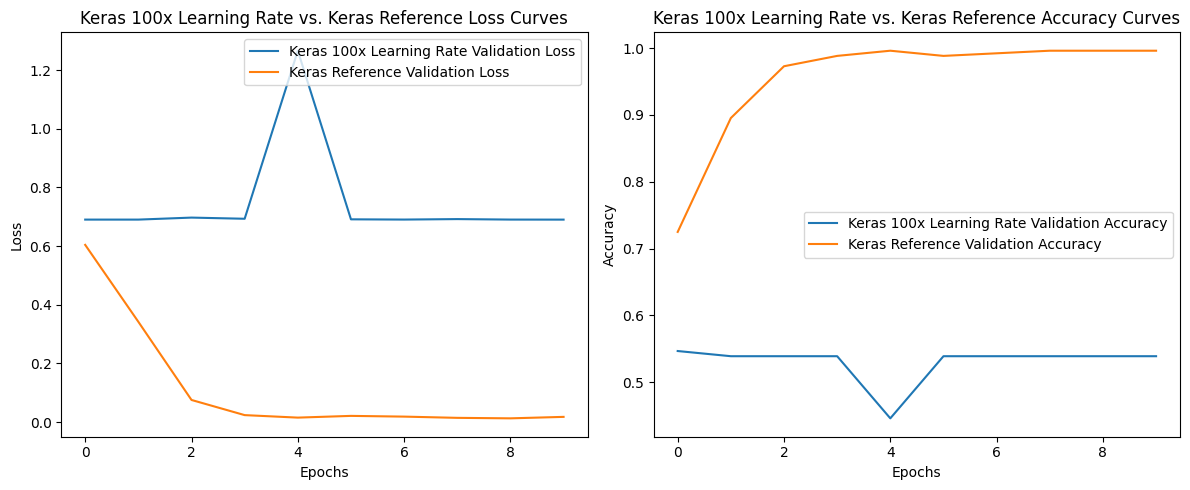

In [36]:
full_model_comparison("Keras 100x Learning Rate", keras_100x_LR_history, "Keras Reference", model_reference_history)

Additional Layers

Loss Difference:
 0    0.009169
1    0.077929
2    0.235195
3    0.099913
4    0.022100
5    0.025760
6    0.009321
7    0.011461
8    0.004829
9    0.004845
Name: loss, dtype: float64
Max Loss Difference: 0.2351949959993363
Accuracy Difference:
 0    0.006790
1    0.130941
2    0.133851
3    0.015519
4    0.012609
5    0.010669
6    0.002910
7    0.006790
8    0.000970
9    0.000970
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.1338505744934081


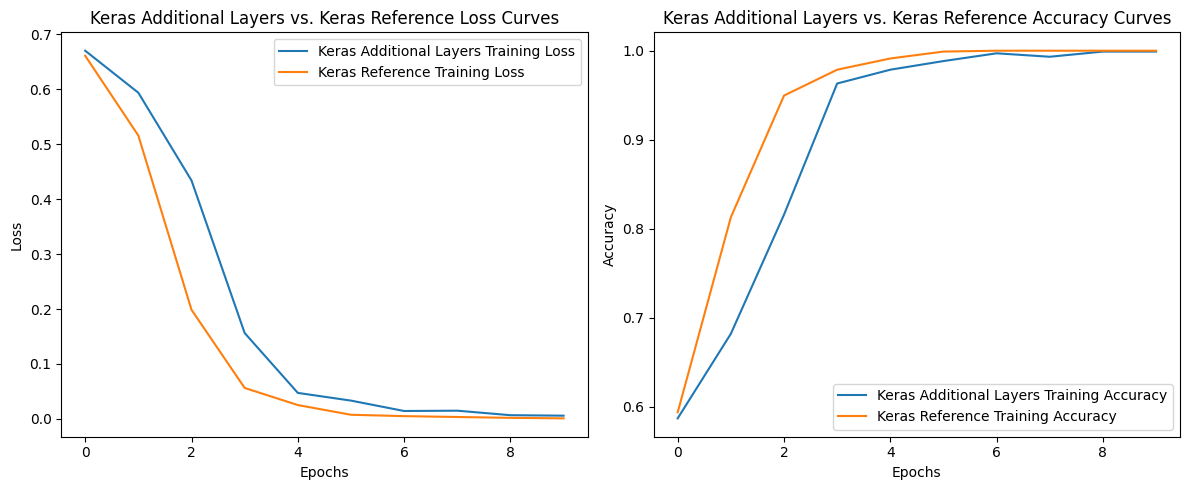

Loss Difference:
 0    0.028850
1    0.188509
2    0.206033
3    0.028509
4    0.030210
5    0.001325
6    0.035240
7    0.017468
8    0.013155
9    0.002162
Name: val_loss, dtype: float64
Max Loss Difference: 0.20603250712156299
Accuracy Difference:
 0    0.065891
1    0.174419
2    0.023256
3    0.003876
4    0.003876
5    0.003876
6    0.003876
7    0.003876
8    0.003876
9    0.000000
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.1744186282157898


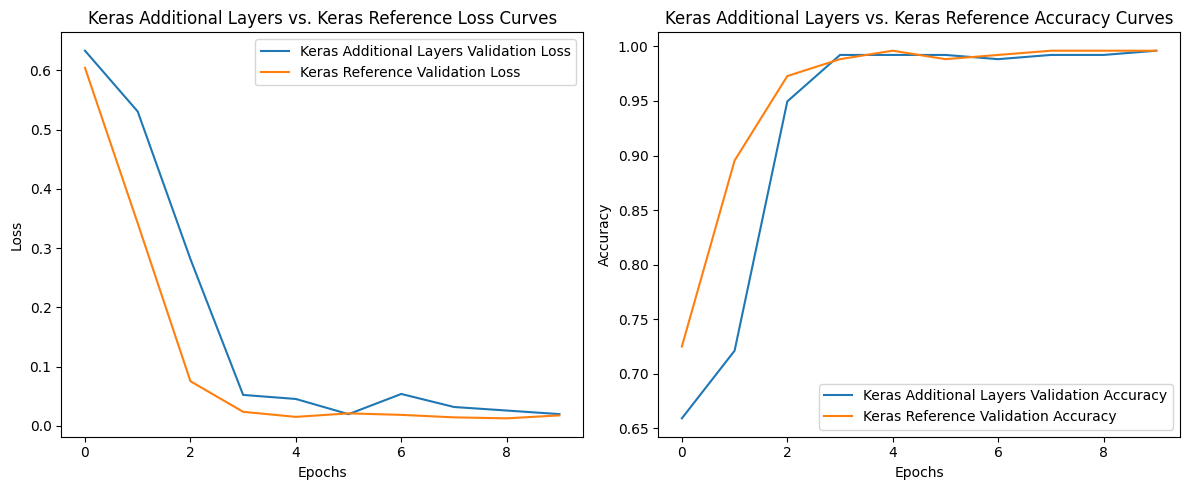

In [37]:
full_model_comparison("Keras Additional Layers", keras_additional_conv_history, "Keras Reference", model_reference_history)

Image Transforms

Loss Difference:
 0    0.024801
1    0.146480
2    0.368279
3    0.306578
4    0.133398
5    0.058046
6    0.034493
7    0.019996
8    0.042968
9    0.022611
Name: loss, dtype: float64
Max Loss Difference: 0.3682792931795121
Accuracy Difference:
 0    0.039767
1    0.229874
2    0.240543
3    0.120272
4    0.041707
5    0.021338
6    0.013579
7    0.005820
8    0.014549
9    0.008729
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.2405431270599364


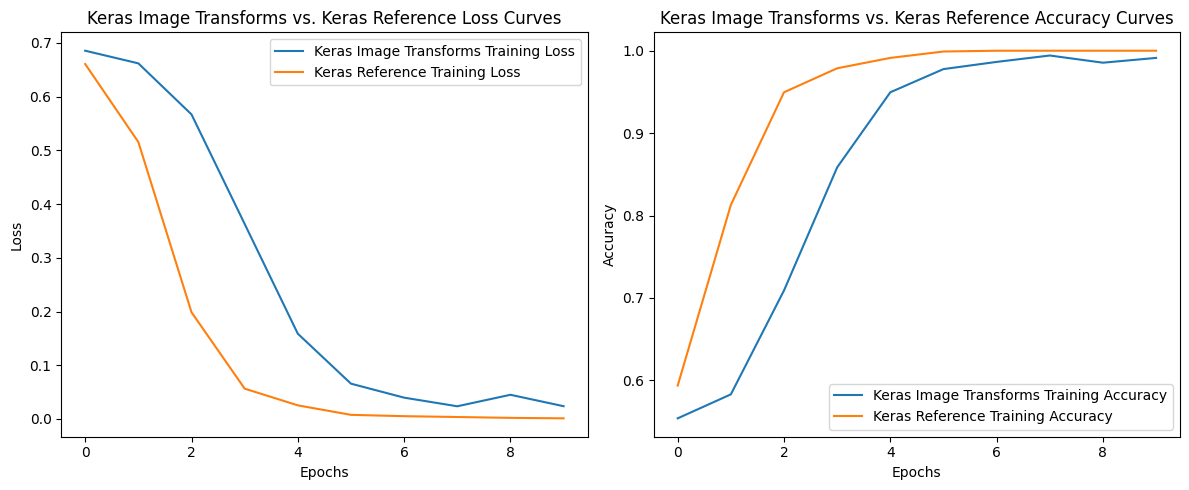

Loss Difference:
 0    0.076147
1    0.290226
2    0.419159
3    0.171457
4    0.041804
5    0.003087
6    0.000488
7    0.018927
8    0.005159
9    0.003859
Name: val_loss, dtype: float64
Max Loss Difference: 0.419158659875393
Accuracy Difference:
 0    0.182171
1    0.244186
2    0.143411
3    0.031008
4    0.003876
5    0.007752
6    0.000000
7    0.003876
8    0.003876
9    0.003876
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.24418604373931885


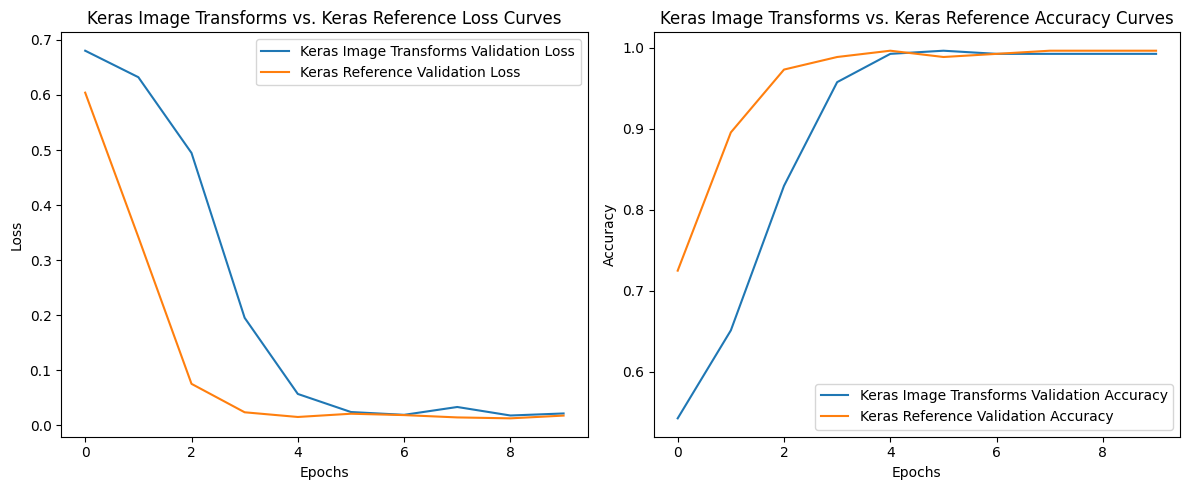

In [38]:
full_model_comparison("Keras Image Transforms", keras_imageTransforms_history, "Keras Reference", model_reference_history)

##### Optimizations vs. Baseline (PyTorch)

10x Learning Rate

Loss Difference:
 0    0.006921
1    0.010603
2    0.035274
3    0.054238
4    0.033512
5    0.061451
6    0.046703
7    0.033947
8    0.008880
9    0.005061
Name: loss, dtype: float64
Max Loss Difference: 0.061450552667819805
Accuracy Difference:
 0    0.011639
1    0.000000
2    0.075655
3    0.033948
4    0.004850
5    0.023278
6    0.014549
7    0.013579
8    0.000970
9    0.001940
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.07565470417070796


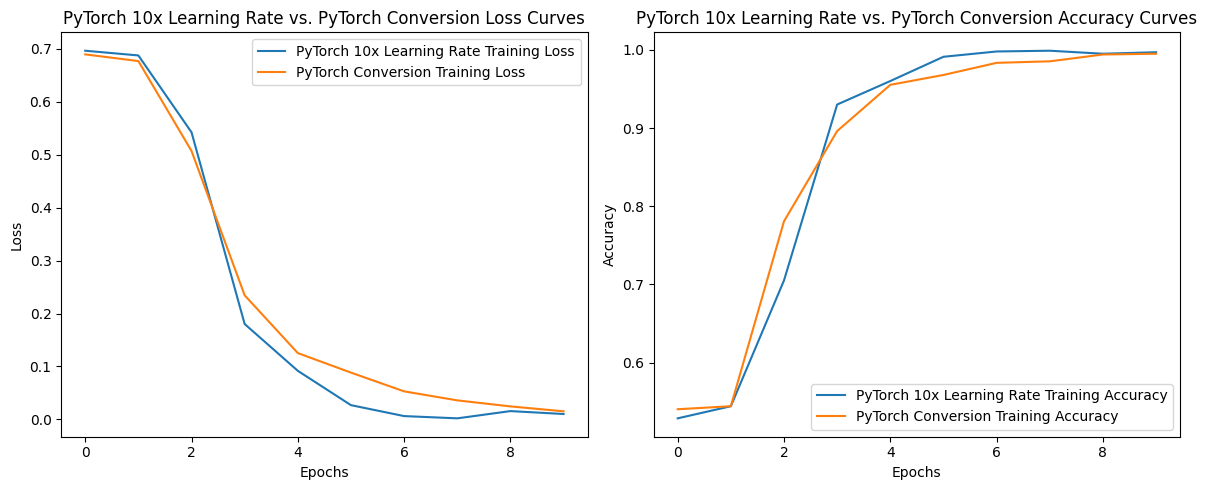

Loss Difference:
 0    0.003539
1    0.035952
2    0.007782
3    0.058923
4    0.013684
5    0.000510
6    0.010965
7    0.016140
8    0.020245
9    0.020719
Name: val_loss, dtype: float64
Max Loss Difference: 0.05892329737544061
Accuracy Difference:
 0    0.000000
1    0.085271
2    0.007752
3    0.027132
4    0.007752
5    0.000000
6    0.007752
7    0.019380
8    0.000000
9    0.003876
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.0852713178294574


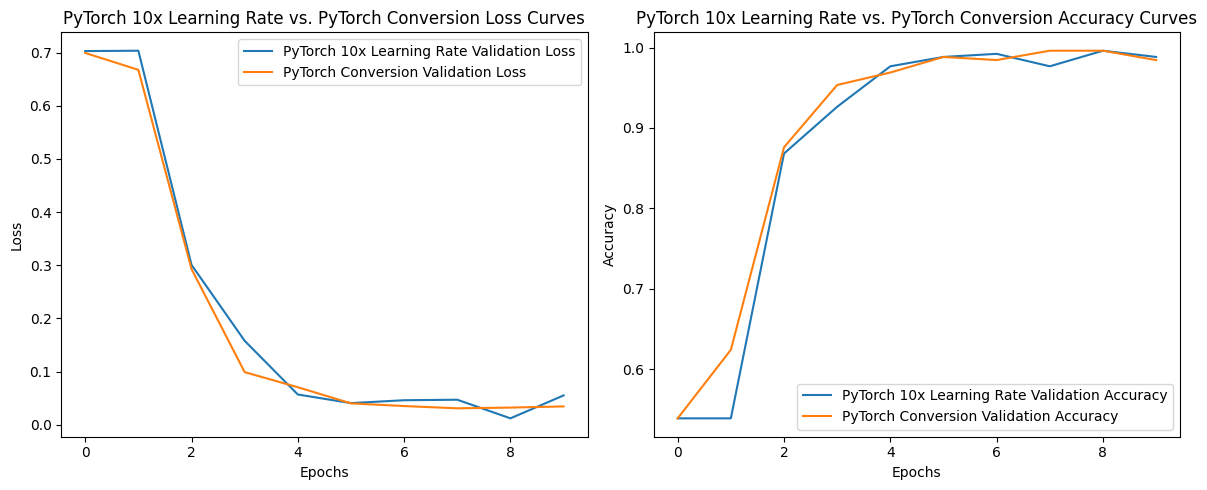

In [39]:
full_model_comparison("PyTorch 10x Learning Rate", pyTorch_10x_LR_history, "PyTorch Conversion", pytorch_conversion_history)

100x Learning Rate

Loss Difference:
 0    31.528974
1     0.796622
2     0.244203
3     0.456773
4     0.564084
5     0.603920
6     0.637433
7     0.653244
8     0.664605
9     0.672420
Name: loss, dtype: float64
Max Loss Difference: 31.528973761726828
Accuracy Difference:
 0    0.059166
1    0.031038
2    0.236663
3    0.353055
4    0.411251
5    0.423860
6    0.439379
7    0.441319
8    0.450048
9    0.451018
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.4510184287099904


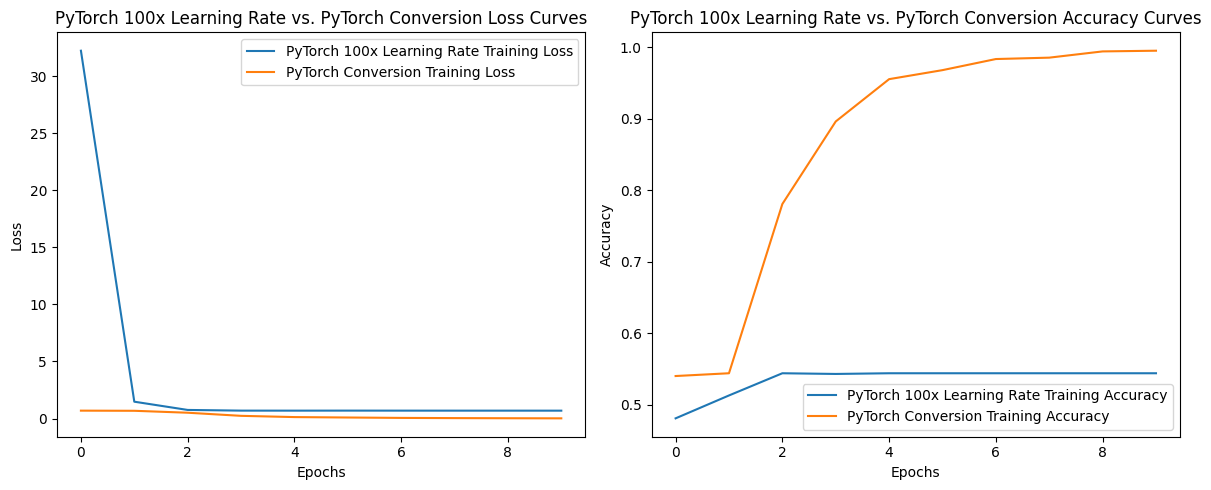

Loss Difference:
 0    0.010723
1    0.037647
2    0.436092
3    0.600230
4    0.646360
5    0.669792
6    0.665945
7    0.677293
8    0.676418
9    0.675650
Name: val_loss, dtype: float64
Max Loss Difference: 0.6772927777841687
Accuracy Difference:
 0    0.077519
1    0.085271
2    0.337209
3    0.414729
4    0.430233
5    0.449612
6    0.445736
7    0.457364
8    0.457364
9    0.445736
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.45736434108527146


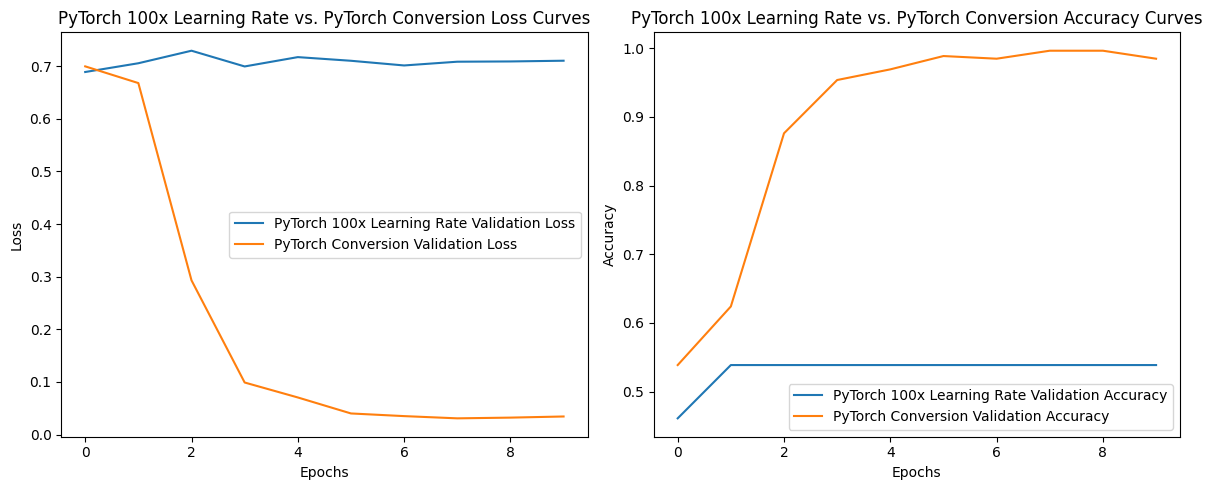

In [40]:
full_model_comparison("PyTorch 100x Learning Rate", pyTorch_100x_LR_history, "PyTorch Conversion", pytorch_conversion_history)

Additional Layers

Loss Difference:
 0    0.000067
1    0.001956
2    0.088955
3    0.109907
4    0.085671
5    0.077421
6    0.050914
7    0.035016
8    0.024184
9    0.015030
Name: loss, dtype: float64
Max Loss Difference: 0.10990733806701261
Accuracy Difference:
 0    0.003880
1    0.000000
2    0.031038
3    0.061106
4    0.032978
5    0.030068
6    0.016489
7    0.014549
8    0.005820
9    0.004850
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.061105722599418044


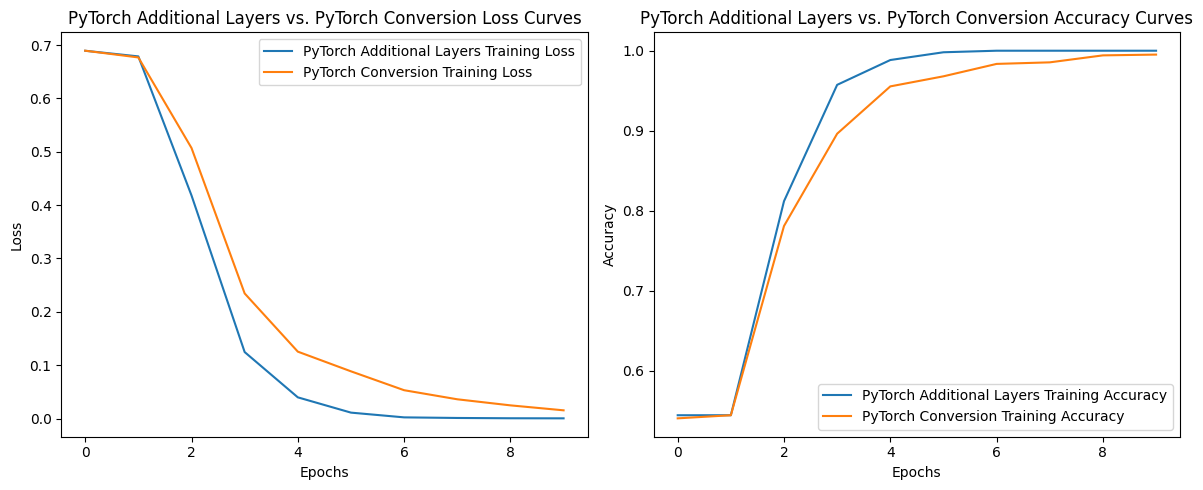

Loss Difference:
 0    0.007345
1    0.014503
2    0.177038
3    0.073336
4    0.057876
5    0.034316
6    0.029318
7    0.028273
8    0.029645
9    0.031702
Name: val_loss, dtype: float64
Max Loss Difference: 0.1770384181290865
Accuracy Difference:
 0    0.000000
1    0.085271
2    0.065891
3    0.038760
4    0.027132
5    0.007752
6    0.011628
7    0.000000
8    0.000000
9    0.011628
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.0852713178294574


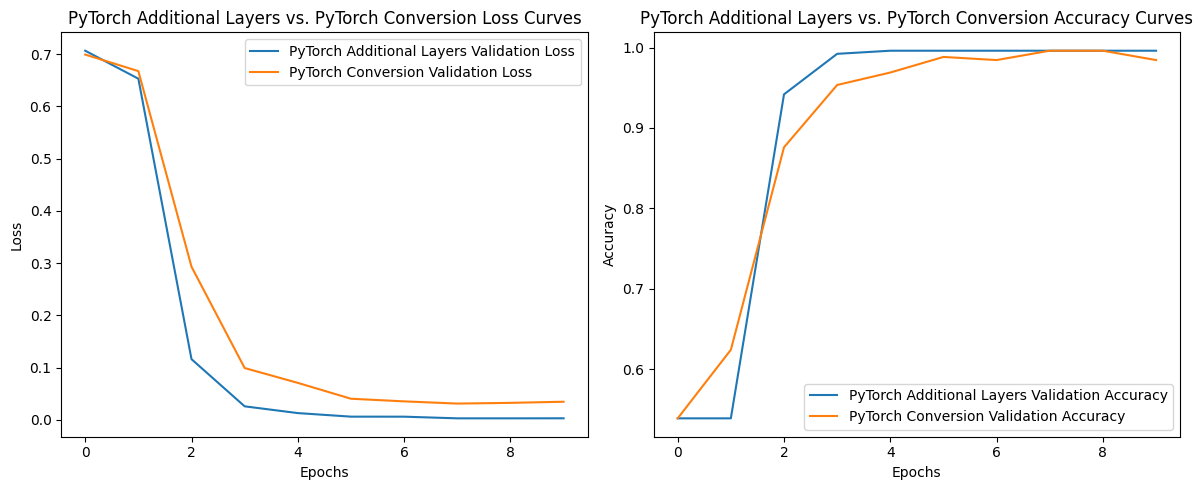

In [41]:
full_model_comparison("PyTorch Additional Layers", pyTorch_additional_conv_history, "PyTorch Conversion", pytorch_conversion_history)

Image Transforms

Loss Difference:
 0    0.007175
1    0.153429
2    0.318720
3    0.149781
4    0.079457
5    0.069909
6    0.044698
7    0.031900
8    0.022893
9    0.014431
Name: loss, dtype: float64
Max Loss Difference: 0.31871964556493737
Accuracy Difference:
 0    0.020369
1    0.181377
2    0.141610
3    0.072745
4    0.025218
5    0.028128
6    0.016489
7    0.014549
8    0.005820
9    0.004850
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.18137730358874882


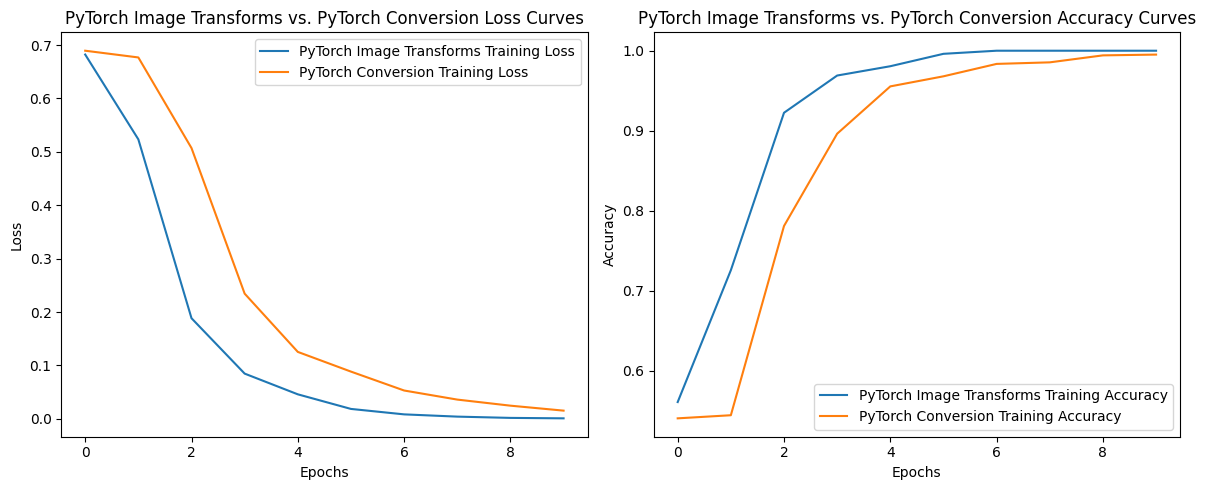

Loss Difference:
 0    0.003304
1    0.084202
2    0.226468
3    0.419769
4    0.268274
5    0.267417
6    0.181258
7    0.155556
8    0.129433
9    0.116005
Name: val_loss, dtype: float64
Max Loss Difference: 0.4197687990963459
Accuracy Difference:
 0    0.000000
1    0.155039
2    0.069767
3    0.232558
4    0.003876
5    0.015504
6    0.003876
7    0.007752
8    0.011628
9    0.003876
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.2325581395348837


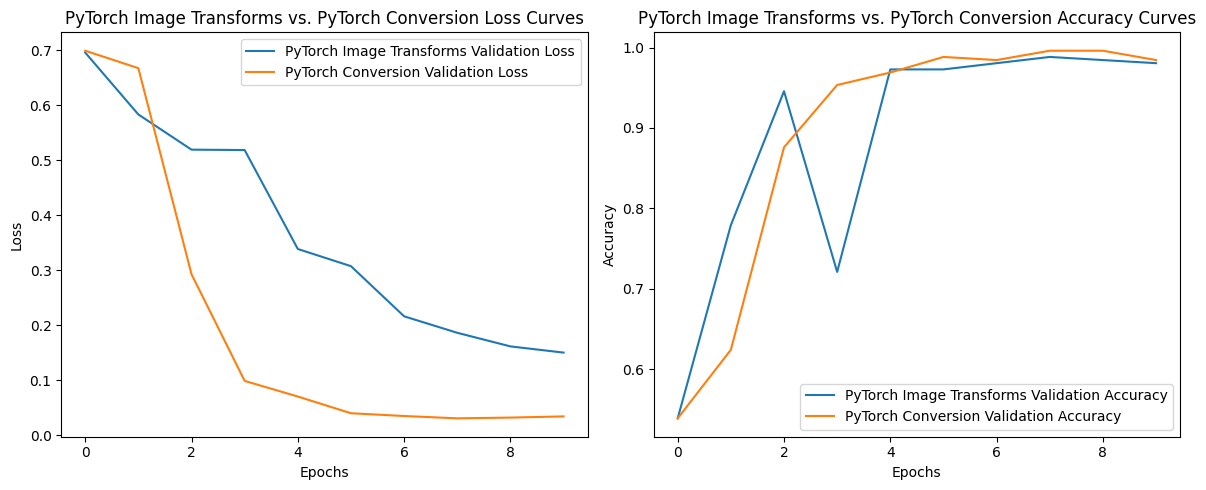

In [42]:
full_model_comparison("PyTorch Image Transforms", pyTorch_imageTransforms_history, "PyTorch Conversion", pytorch_conversion_history)